# <font color=blue> <center> Telecom Customer Churn Data </font> </center>

### <font color=purple> <center> Mini-Project starts in purple under previous lab </font> </center>
***

# <font color =blue> Business Understanding</font>

#### The dataset we chose is entitled "Telecom_Customer Churn" and is available for download at  https://www.kaggle.com/abhinav89/telecom-customer/data. Although descriptive information regarding this dataset is relatively sparse, additional information regarding this dataset can be found at: http://m.library2.smu.ca/bitstream/handle/01/22018/yu_wei_masters_2005.PDF?sequence=1. 

#### As the title indicates, the focus of the dataset is to explore and define what factors contribute to churn in the Telecom industry. "Churn" measures the number of consumers that have ended their customer relationship with a provider. Churn is measured in a binary form, simply indicating whether a consumer did or did not churn. Although telecommunication today is a broad term that encompasses everything from broadacast media to wide area networks, the businesses in this study specifically refer to mobile cellular service providers. 

#### With 100 attributes indicating everything from the demographics of each consumer to highly technical aspects of each customers call, we need to concentrate our analysis on what would generate the most impact in explaining churn. First, we want to delve into the demographics of the dataset to determine if the 100,000 records in this dataset encompass a sufficiently random population to truly indicate causal inferences. We then want to investigate technical aspects of the data to determine what provider failures are more likely to create churn. The demographics may also indicate which subtypes of consumers are more inclined to be loyal and should not be the focus of marketing campaigns. 

#### Secondarily, we should look at the bulk of the data which are technical statistics on each consumer's cell usage experience to determine what specific failures in cell service lead to consumer attrition/ create churn. Some of these variables are intuitive and would easily reduce customer satisfaction, such as the dropped calls variables, which could lead to churn. The telecom industry frequently uses factors like those listed in the dataset like dropped call counts, number of calls to the call center, and  number of overages on billing minutes and data to create a CSI compounded factor that helps monitor customers happiness with the service because churn is a very expensive problem from them.  This dataset was perfectly created to more concretely identify churn risk factors.

#### Other benefits to the dataset include the amount of  in-depth statistics and clarity of each subcomponent of the data. An example of this is the fact that it is relatively easy to see if the call and data volumes are increasing or decreasing across time blocks.  There is probably also a billing overage variable or two in the set.  People who trend down in usage are very likely candidates for churn because they are already tempering down their usage - whether it is already too late to save their subscription or not is another matter of course.

#### In this study, we intend to determine concrete variables that marketing and quality assurance teams should focus on to retain incoming revenue by differentiation between logical assumptions about consumer desires and the cold, hard reported statistics. This will help the major wireless firms - who are seemingly always embroiled in direct attack marketing campaigns with each other - focus on which values truly impact their bottom line and what their focus should be in securing future revenue.

### The economic impact of a successful analysis is well over 180 billion dollars annually  as depicted by the graph below that just evaluates the four major key players from Market Realist, "http://marketrealist.com/2017/09/how-telecom-players-stack-up-after-2q17/ ."

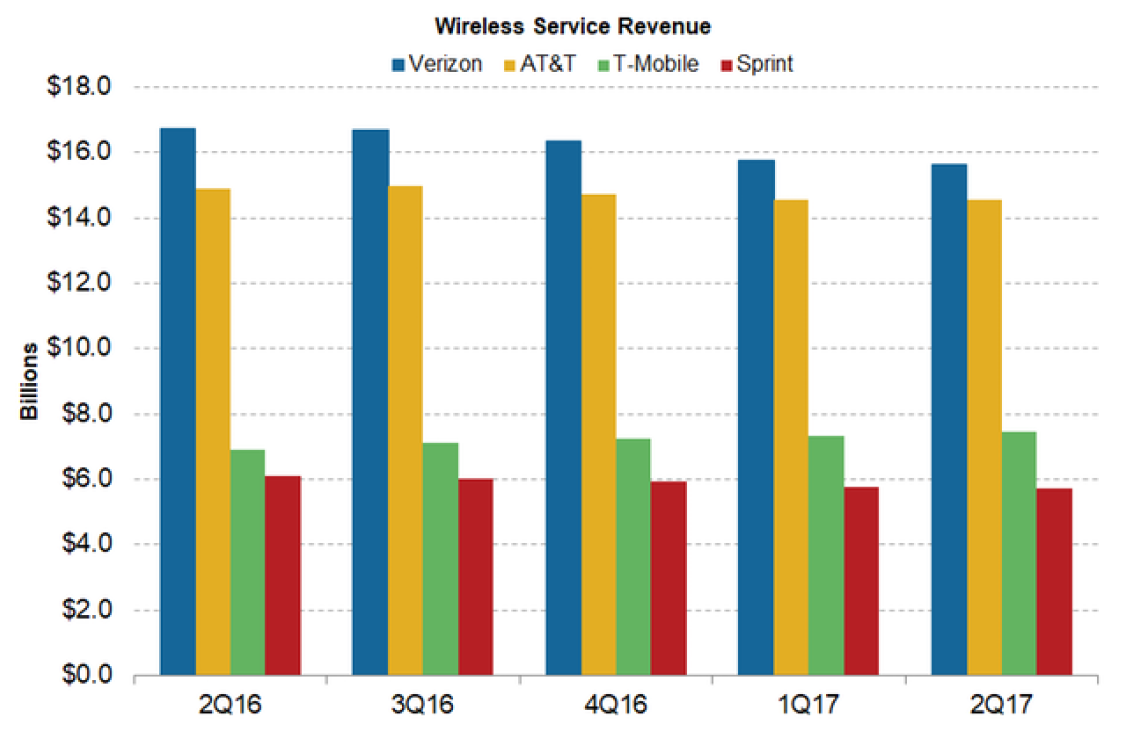

In [1]:
from IPython.core.display import Image
Image(filename=('wireless_graph.png'))

# <font color=blue>Data Understanding</font>

### From our original 100 variables, we trimmed the list down to a more workable and logical subset. This was done both through statistical analysis as well as business intelligence of the telecom sector. The full methodology we leveraged for dimensionality reduction to identify the most valueable attributes will be further defined in the <font color=blue>"Data Quality"</font> Section.  
### The attributes fall loosely into the categories of quality issues, billing rate issues, and behavioral indicators that may demonstrator either “stickiness” or a willingness to churn. For instance, the attribute 'custcare_mean' below, shows an average monthly number of calls into the customer care center for complaint/resolution purposes and may be a strong indicator of dissatisfaction with the service being provided.  Other evidence of dissatisfaction can be found in the decrease of use over time, Change_MOU, which may yield greater insight and predictive power than simple measurements of minutes of use  whereas the price of the handset and high minutes of might prove to be variable the indicate stickiness of the service. 

### The potential business drivers are for churn that the variables related to those to help of focus in:
 
#### Quality issues like dropped calls and calls into the care center –
- BLCK DAT MEAN Mean number of blocked (failed) data calls
- BLCK DAT RANGE Range of number of blocked (failed) data calls
- BLCK VOE MEAN Mean number of blocked (failed) voice calls
- BLCK VCE RANGE Range of number of blocked (failed) voice calls
- COMPLETE MEAN Mean number of completed calls  (good to see percentage of completed versus dropped)
- COMPLETE RANGE Range of number of completed calls
- Area (potentially a driver based on coverage quality or local telecom competitive rates – see grid on churn percentages below)
 
#### Billing rate issues like overages and over all high bills –
- VOEOVR MEAN Mean revenue of voice overage
- VCEOVR RANGE Range of revenue of voice overage
 
#### Behavioral indicators (not necessarily root cause but a good temperature read) –
- Call volume increasing or decreasing à
- Avg3qty – avg6qty – near 0 or positive should be less likely to churn
- Avg3mou – avg6qty – near 0 or positve should be less likely to churn
- CHANGE MOU – percentage change on minutes of use
- PRIZM SOCIAL ONE Social group letter only (might be interesting demographic variable if well propulated)
- TOT ACPT Total offers accepted from retention team
- TOT RET Total calls into retention team
- AVGMOU Average monthly minutes of use over the life of the customer
- AVGQTY Average monthly number of calls over the life of the customer
- AVGREV Average monthly revenue over the life of the customer
- ADJMOU Billing adjusted total minutes of use over the life of the customer
- ADJQTY Billing adjusted total number of calls over the life of the customer
- ADJREV Billing adjusted total revenue over the life of the customer
- hnd_price  (price of handset)
- phones  (# of phones)
 
#### Stickiness factors (things likely to keep a subscriber longer, like number of lines with contracts on them)
- Business or personal account – biz accounts can’t churn easily, but I don’t see an attribute for account type.  Anybody see one?
- Length of service – longer may be less likely to churn, but if they are near a contract end window that is also important
- Months - length of service in months
- New_Cell – might be associated with a contract term that maintains stickiness
- ACTVSUBS Number of active subscribers in household
- EQPDAYS Number of days (age) of current equipment
- CRCLSCOD Credit class code


### The variables we would like to focus on and why:
> #### Eqpdays  - the older the handset, the more likely a person is coming up on the end of a contract period and looking for the next good deal to get a new handset which may not be with their current subscriber
> #### Custcare_mean (Mean number of customer care calls) – this is an important indicator of satisfaction as calls into customer care are both expensive to the carrier and usually indicate that the customer is unhappy with some aspect of their service.  
> #### hnd_price (price they paid for the handset) and totmrc_mean (reoccurring monthly bill) are important price sensitivity aspects.  A single high bill is not as likely to cause serious dissatisfaction; however a repeatedly high bill most certainly will and this attribute is a good indicator of frequent high bills and potentially many overage charges.
> #### Totmou(Total minutes of use over the life of the customer) – stickiness of the service should be indicated by very high usage of the service; additionally, we can theorize that high minutes of use also indicate good quality service since variables concerning dropped call frequency did not show to be very statistically significant. 
> #### Change_mou (Percentage change in monthly minutes of use vs previous three month average) - This will determine increasing or decreasing usage that will be important as a demonstration of satisfaction.  Users that are beginning to lower their usage may be getting ready to churn. 
> #### Uniqsubs (number of subscribers in the household) is an important indicator of stickiness.  Plans that have more than one individual on them are less likely to see churn than a simple plan that is for a single individual because a change in telecom carrier would have larger effects.


### Data Loading and Checking

The CSV file is imported using pandas below.  The data frame include 100 attributes. The data information shows that recordings for each attributes are different since the number of missing values are all differernt.  21 attributes are loaded as object which indicate that the contents are string values. 79 attributes have numerical values.  

In [2]:
# load the dataset and packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

df = pd.read_csv('Telecom_customer churn.csv') # read in the csv file

df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou     ...       forgntvl  \
0          0.0          0.0        0.0     -157.25     ...            0.0   
1          9.1          0.0        0.0      532.25     ...            0.0   
2          0.0          0.0        0.0       -4.25     ...            0.0   
3          0.0          0.0        0.0       -1.50     ...            0.0   
4          0.0          0.0        0.0       38.50     ...            0.0   

   ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  \
0       N       U       U        U         U         U         Y    361.0   
1       Z       U       U        U         U         U         Y    240.0   
2       N       U       Y        U         U         U         Y   1504.0   
3       U       Y       U        U         U         U         Y   1812.0   
4       I       U       U        U         U         U         Y    434.0   

   Customer_ID  
0      1000001  
1      1000002  
2      1000003  
3      1000004  
4      1000005  

[5 rows x 100 columns]

In [3]:
# Data Frame Size
df.shape

(100000, 100)

In [4]:
# Data Type

# print (df.dtypes)
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
rev_Mean            99643 non-null float64
mou_Mean            99643 non-null float64
totmrc_Mean         99643 non-null float64
da_Mean             99643 non-null float64
ovrmou_Mean         99643 non-null float64
ovrrev_Mean         99643 non-null float64
vceovr_Mean         99643 non-null float64
datovr_Mean         99643 non-null float64
roam_Mean           99643 non-null float64
change_mou          99109 non-null float64
change_rev          99109 non-null float64
drop_vce_Mean       100000 non-null float64
drop_dat_Mean       100000 non-null float64
blck_vce_Mean       100000 non-null float64
blck_dat_Mean       100000 non-null float64
unan_vce_Mean       100000 non-null float64
unan_dat_Mean       100000 non-null float64
plcd_vce_Mean       100000 non-null float64
plcd_dat_Mean       100000 non-null float64
recv_vce_Mean       100000 non-null float64
recv_sms_Mean       

### Categorical Attributes Information

There are 21 attributes that hve string values among 100 attributes.

The focus of this section will be:
- the independence of each individual attribute from the 'churn'
- attributes that can be converted into numerical values without using dummy variables. 

In [5]:
# data frame with only string data
df_obj = df.loc[:, df.dtypes == object]
col_list_obj = list(df_obj)
obj_len = len(col_list_obj) # number of object attributes
print("Number of Categorical Attributes = ", obj_len)

Number of Categorical Attributes =  21


### Below bar chart shows the number of levels visually.  

#### Most of the attributes shows only two or three levels.  The attributes with large number of levels are as follows:

- 'CRCLSCOD' : Credit class code
- 'AREA' : Geographic area
- 'DWLLSIZE' : Dwelling size
- 'ETHNIC' : Ethnicity roll-up code

#### The following attributes can be converted into numerical attributes since they have only two levels:
- 'asl_flag' : Account spending limit (N/Y)
- 'refurb_new' : Handset: refurbished or new (N/R)
- 'ownrent' : Home owner/renter status (O/R)
- 'dwlltype' : Dwelling unit type (S/M)
- 'infobase' : InfoBase match (M/N)
- 'kid0_2'   : Child 0 - 2 years of age in household (U/Y)
- 'kid3_5'   : Child 3 - 5 years of age in household (U/Y)
- 'kid6_10'  : Child 6 - 1 0 years of age in household (U/Y)
- 'kid11_15' : Child 11- 15 years of age in household (U/Y)
- 'kid16_17' : Child 16- 17 years of age in household (U/Y)
- 'creditcd' : Credit card indicator (Y/N)

#### 'dwllsize' attribute has 15 levels from A to O.  Based on the frequency distribution, it can be converted into numerical values from 1 (A) to 15 (O) accordingly. 

#### 'infobase' attribute needs its frequency checed since only one out of two levels is dominent.  This attribute can be removed if the small frequency level is negligible. 


### New Attributes

#### 'area' attribute has 19 different areas in US.  It may be interesting to convert the area name with longitude and latitude attributes so that it may reveal some hidden information about the location. For example, warmer or coastal area can churn less or more. As a result of this 'area_longitude' and 'area_latitude' attributes will be generated.

#### "kidTotMin" attribute can be created by adding all 'kid*' attributes.  This will not represent the total number of kids exactly since multiple kids can be present in one age bracket.  However, this new attribute will give the minimum number of kids in a household.  This attribute may be important since it may be hard to churn with multiple family members/dependents.  

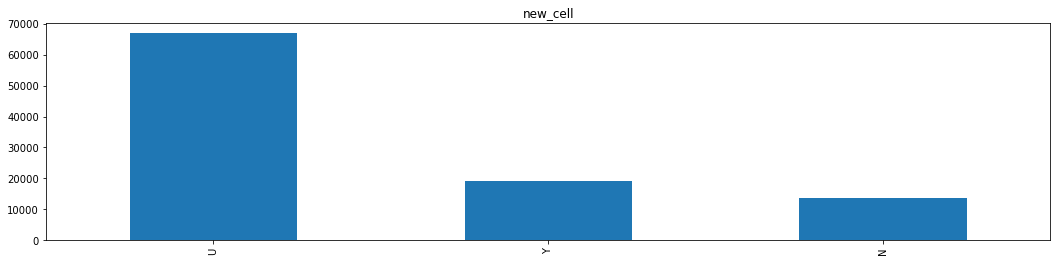

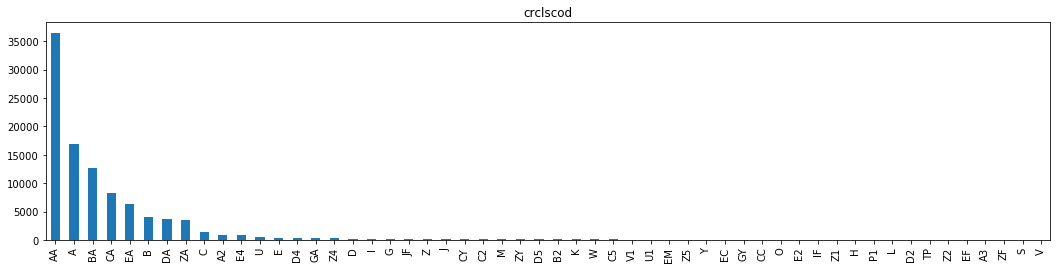

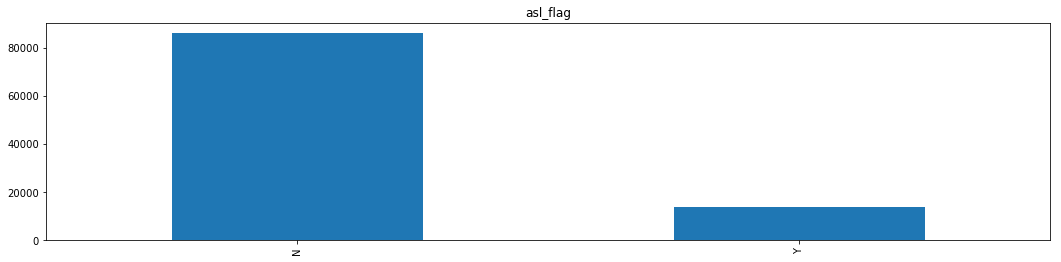

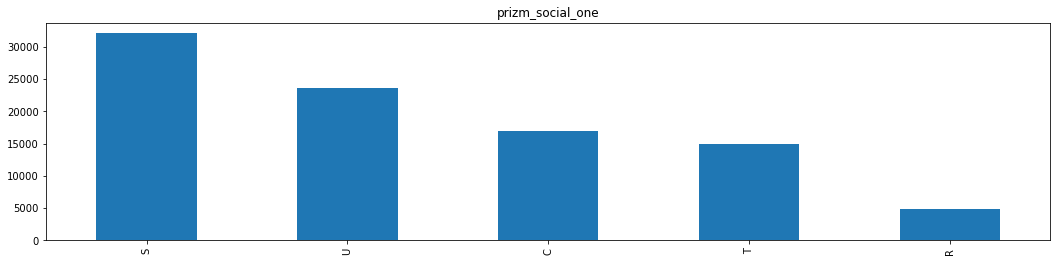

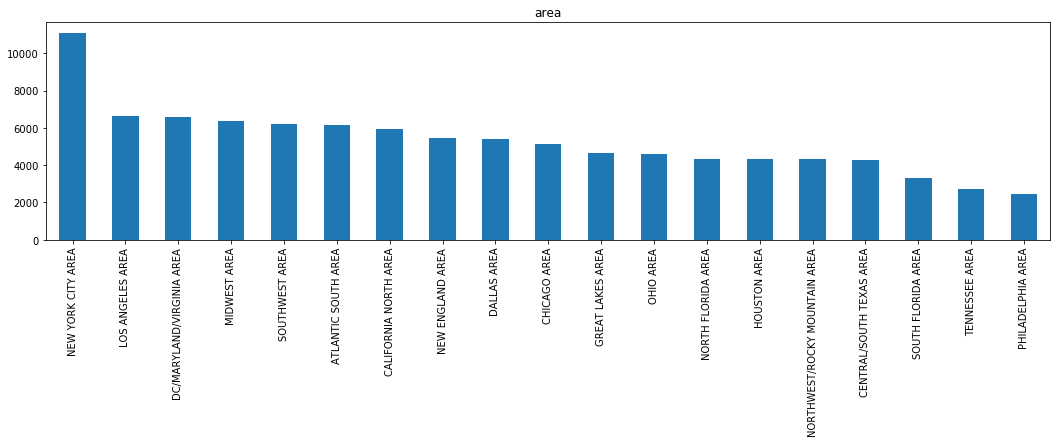

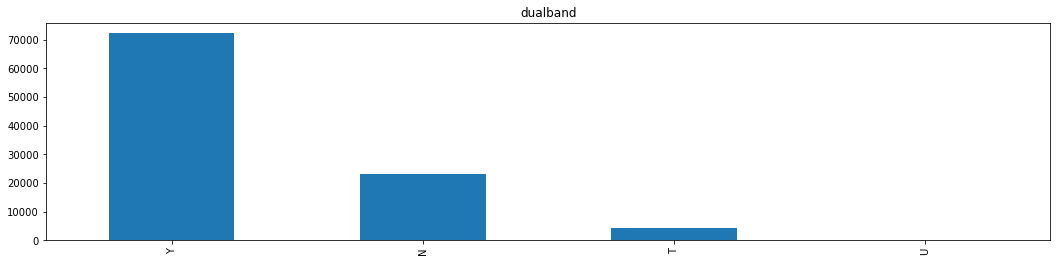

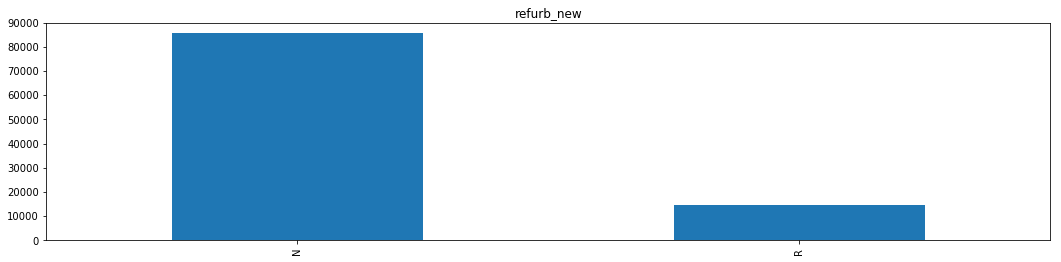

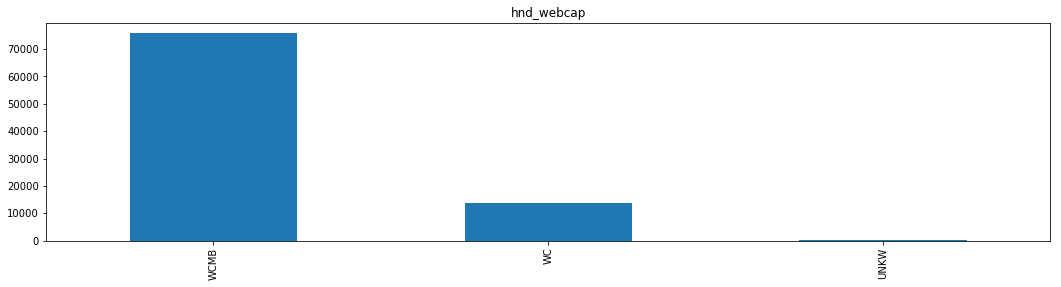

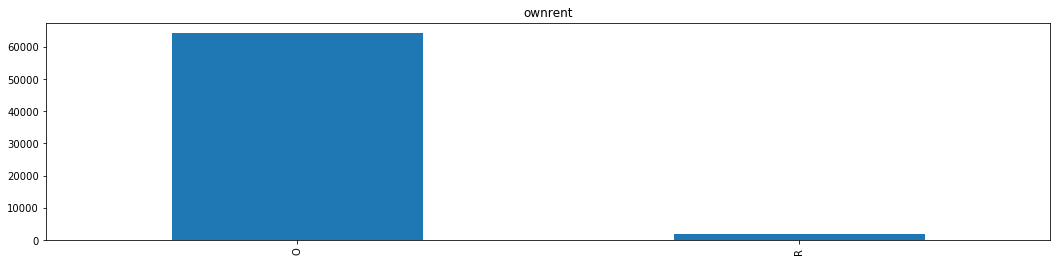

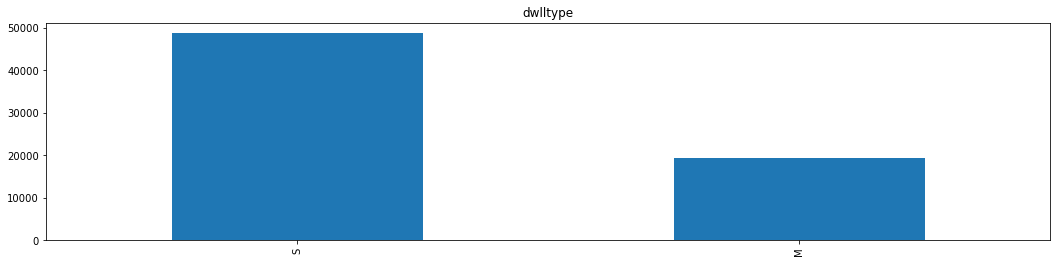

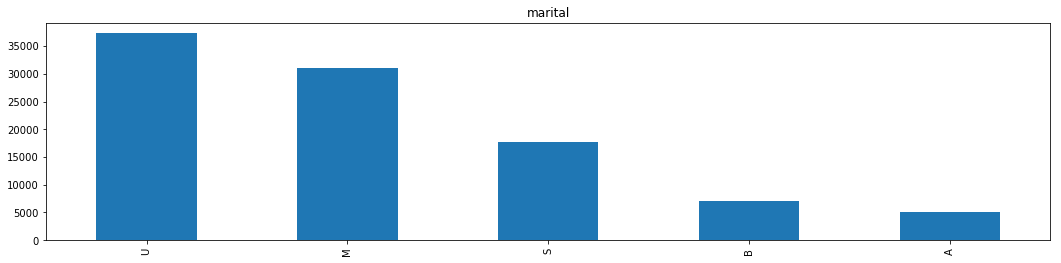

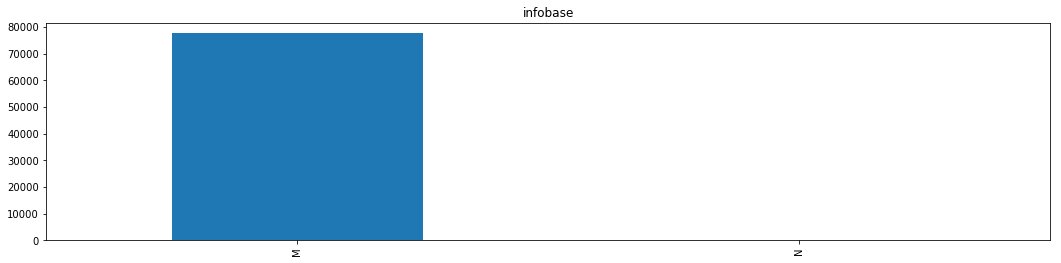

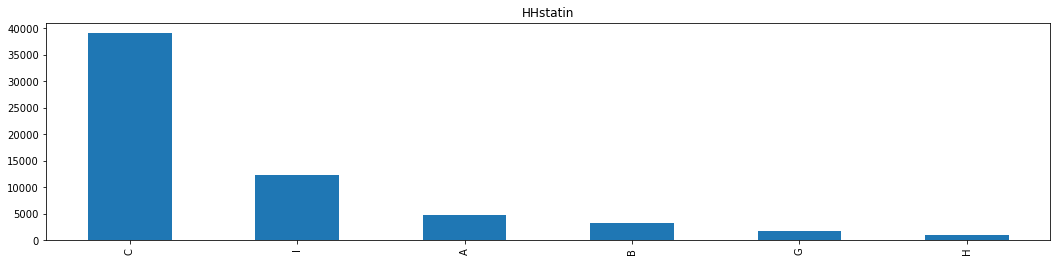

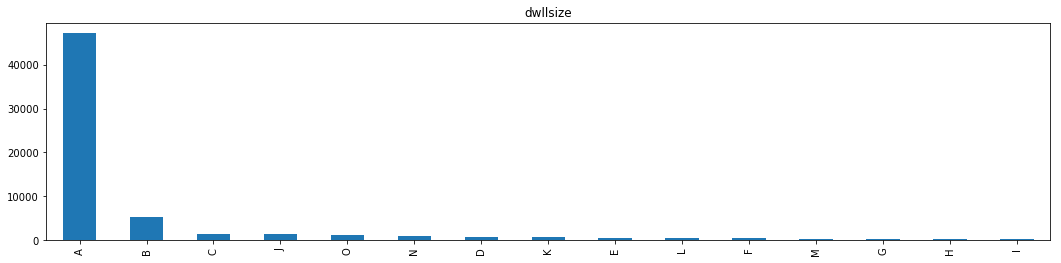

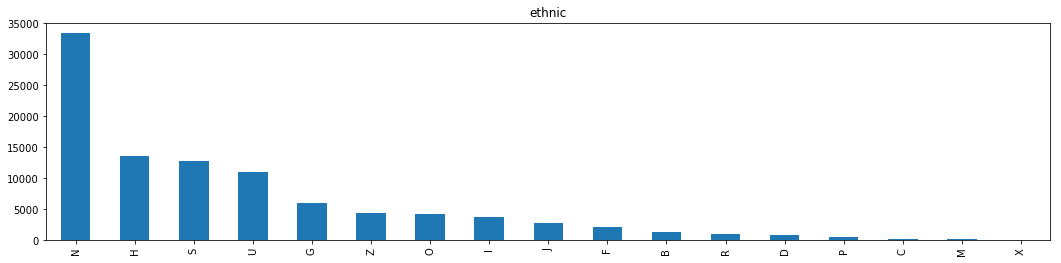

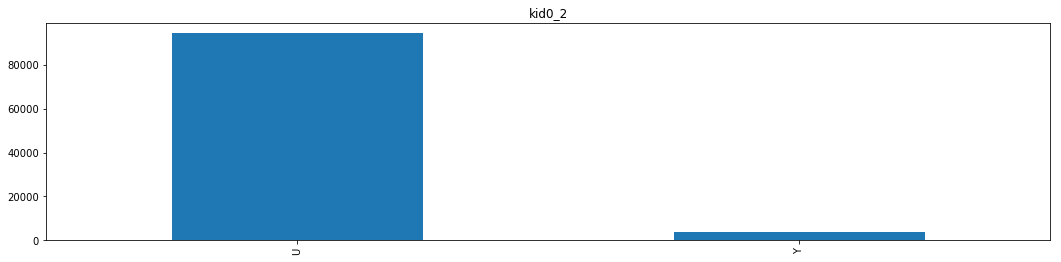

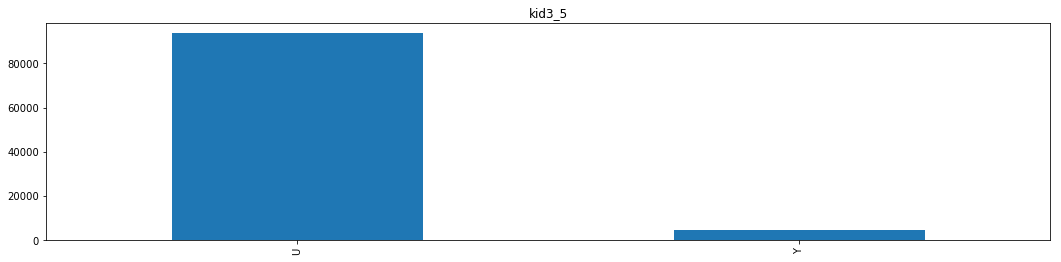

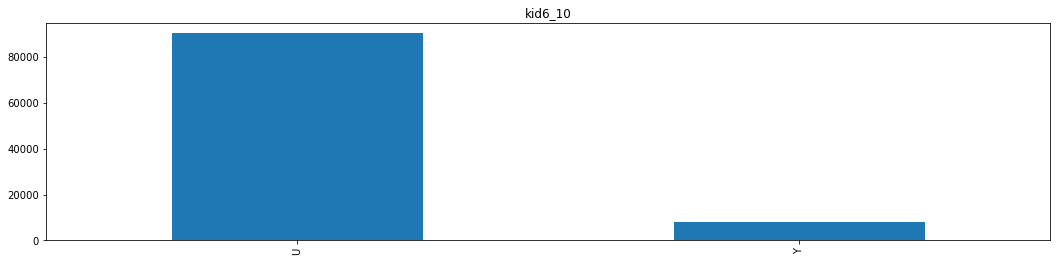

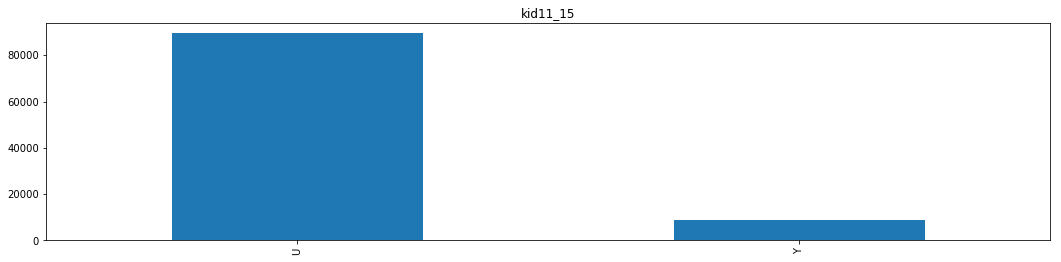

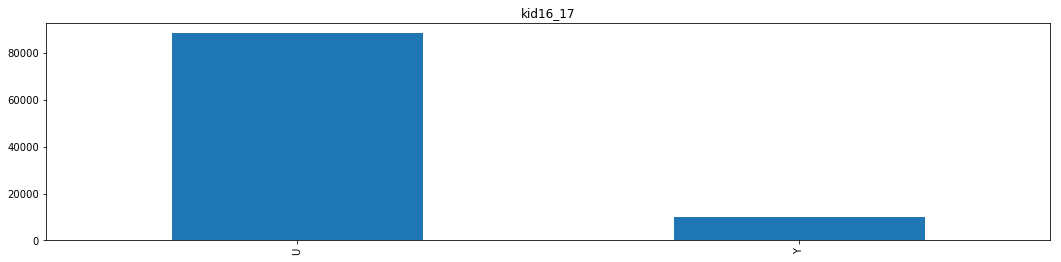

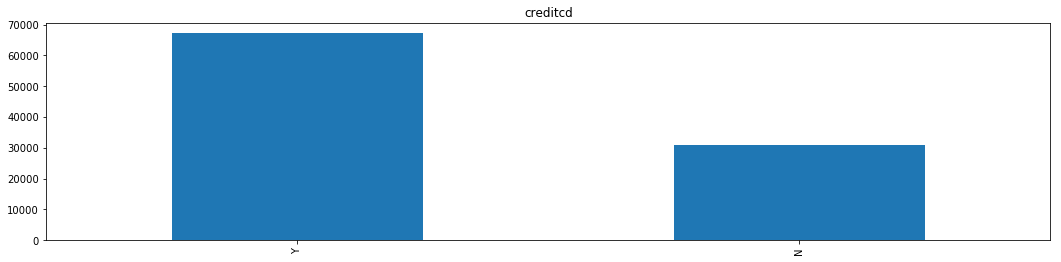

In [6]:
# Frequency plot for Categorical attributes

for i in range(0,21):
    plt.figure(figsize = (18,4))
    ax = df[col_list_obj[i]].value_counts().plot(kind='bar')
    plt.title(col_list_obj[i])
    plt.show()

#### Below, the level frequency shows that more than 99.7% of 'infobase' value is M. This attribute will probably not explain much about the churn so this attribute can be dropped later. 

In [7]:
# Frequency check for 'infobase' levels

print(' InfoBase Levels : \n', df['infobase'].value_counts())
print('\n Churn Levles : \n', df['churn'].value_counts())

 InfoBase Levels : 
 M    77697
N      224
Name: infobase, dtype: int64

 Churn Levles : 
 0    50438
1    49562
Name: churn, dtype: int64


### Chi-Square Independence Test

#### All 21 categorical variables are tested to see if there is a significant association with 'churn' values. Attributes are sorted by p-value so the top attributes have more association with 'churn' values. 

In [8]:
# Chi-Square Test to check the independence from 'churn'
# Output: Attribute name and Chi-square p-values

import scipy.stats as scs
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))

p_value = np.zeros(obj_len) # zero vector with the number of categorical attributes

# Collecting Chi-square test p-values for all categorical attributes vs. 'churn'
for i in range(0,obj_len):
    chiOut = chisq_of_df_cols(df, 'churn', col_list_obj[i])
    p_value[i] = chiOut[1]

# print(p_value)
# col_list_obj_np = np.array(col_list_obj)
# pValSig = np.ix_(p_value < 0.01) # Index of p-value that is very significant
# print('Attributes having Chi-Square P-value less than 0.01 = ', col_list_obj_np[pValSig])

# Print Attribute name and Chi-square p-values in a ascending order
Chi2_Result = pd.DataFrame({'Attribute' :col_list_obj,'p-value':p_value})
Chi2_Result = Chi2_Result.sort_values(by = 'p-value', axis = 0, ascending = True)
Chi2_Result = Chi2_Result.reset_index(drop = True)
print(Chi2_Result)

# Source of def "chisq_of_df_cols" <https://codereview.stackexchange.com/questions/96761/chi-square-independence-test-for-two-pandas-df-columns>

           Attribute        p-value
0           asl_flag  6.909458e-107
1           crclscod  7.984365e-106
2         hnd_webcap   3.603129e-90
3             ethnic   2.002684e-79
4           dualband   8.328702e-63
5               area   8.530675e-47
6         refurb_new   9.965157e-24
7            marital   1.048883e-16
8   prizm_social_one   6.990531e-09
9           creditcd   1.449249e-07
10          infobase   2.830622e-06
11          dwlltype   5.457283e-04
12            kid0_2   2.473489e-03
13           ownrent   4.775968e-03
14          HHstatin   3.978302e-02
15            kid3_5   1.455319e-01
16          kid16_17   1.888888e-01
17          dwllsize   2.008008e-01
18          new_cell   2.557010e-01
19          kid11_15   2.785074e-01
20           kid6_10   5.144683e-01


#### A heatmap is generated below to check the above independence visually.  Only top five significant attributes are plotted with churn values.  There were no drastic differences, but the frequency counts show about 5% differences in some instances. 

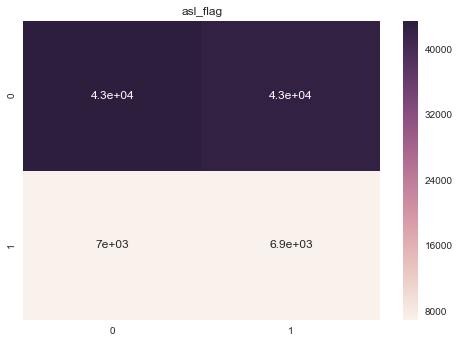

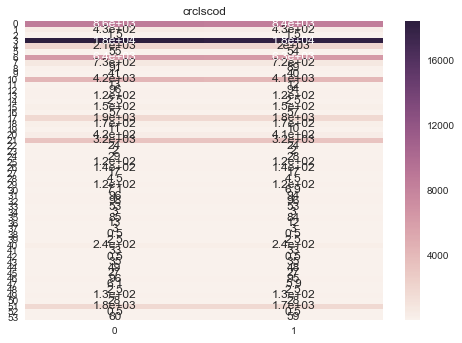

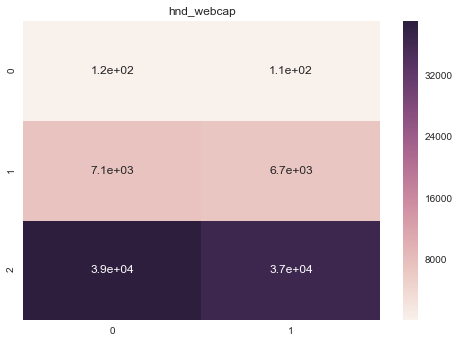

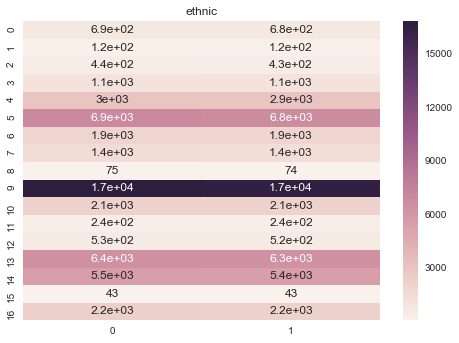

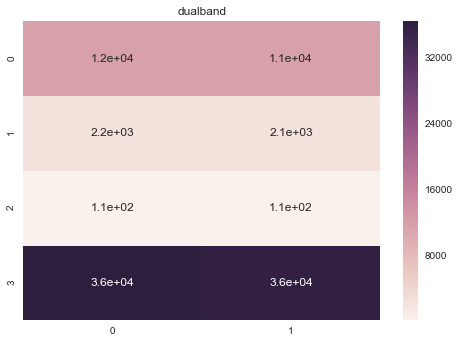

In [9]:
# Contingency table for the Top 5 most significant attributes in independence with 'Churn' 
    # Numbers in the heatmap = frequency,  
    # low = levels of the table name attribute,  
    # Column = levels from 'churn'

import seaborn as sns 

for i in range(0,5):
    chiOut = chisq_of_df_cols(df, 'churn', Chi2_Result.loc[i][0])
    sns.heatmap(chiOut[3], annot = True)
    plt.title(Chi2_Result.loc[i][0])
    plt.show()

#### The bar charts below are utilized to visualize the frequency differences more clearly. 

The account spending limit (N/Y) ratio with churn(0/1) shows some difference.  It can be speculated that those who do not need the spending limit have more dispensiable income for handset communication so they tend to churn easily than those who have a spending limit.  

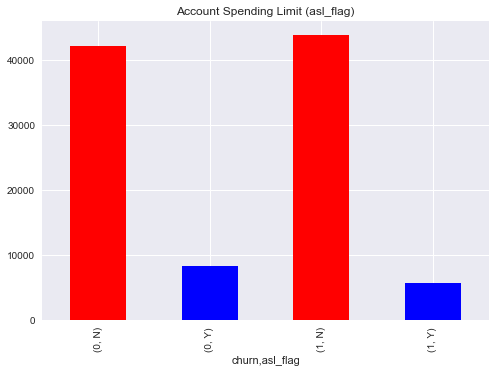

In [10]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Account Speding Limit (asl_flag)'

# Data Frame Groupby 'Churn'
df_churn = df.groupby(['churn'])

# bar churn vs. asl_flag
ax = df_churn.asl_flag.value_counts().plot(kind='bar', color = ['red', 'blue'], stacked = True)
plt.title('Account Spending Limit (asl_flag)')
plt.show()

#### Ethnic groups, geographic area, marital status, and households having kids 0-2 years old is also checked.  The frequency distributions are almost the same for each churn levels.  By visual inspection, there is no level that shows more than 10% differences in frequency for corresponding levels. 

There are 5 different age groups for kids.  'kid0_2' has the highest p-value from the chi-square test.  It is assumed that a family with having a new born baby will have no energy and money so they will less likely churn; however, the frequency table above shows that families that switched have more kids between the ages of 0 and 2, which is counterintuitive to what we had assumed.  

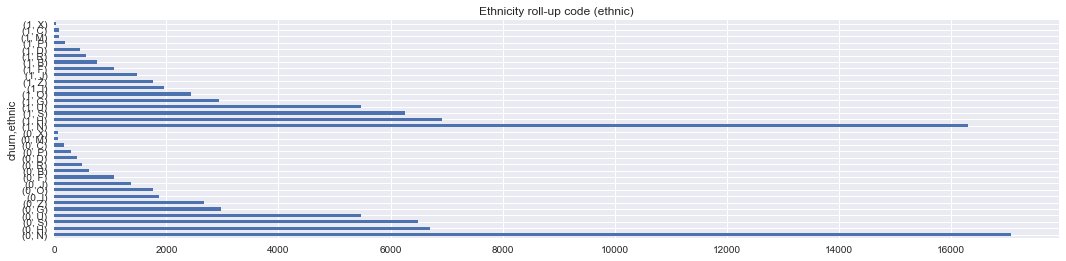

In [11]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.ethnic.value_counts().plot(kind='barh')
plt.title('Ethnicity roll-up code (ethnic)')
plt.show()

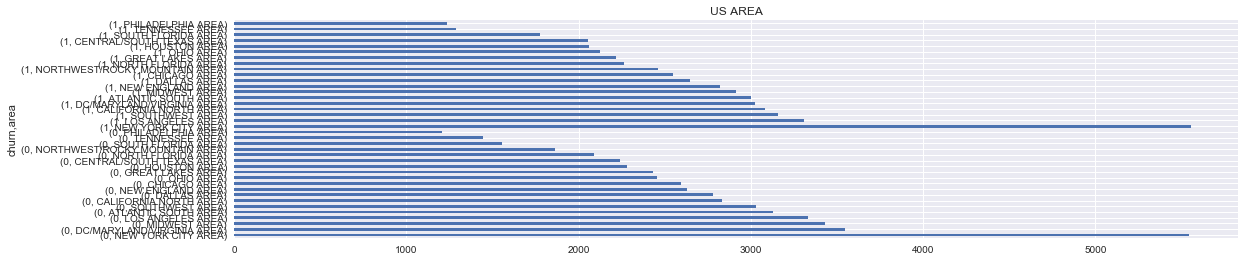

In [12]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.area.value_counts().plot(kind='barh')
plt.title('US AREA')
plt.show()

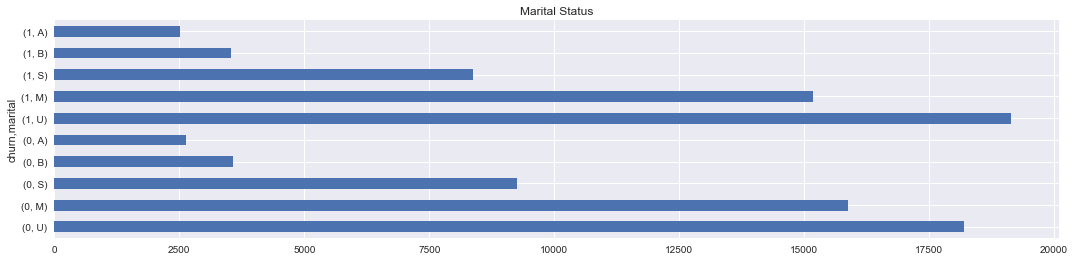

In [13]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.marital.value_counts().plot(kind='barh')
plt.title('Marital Status')
plt.show()

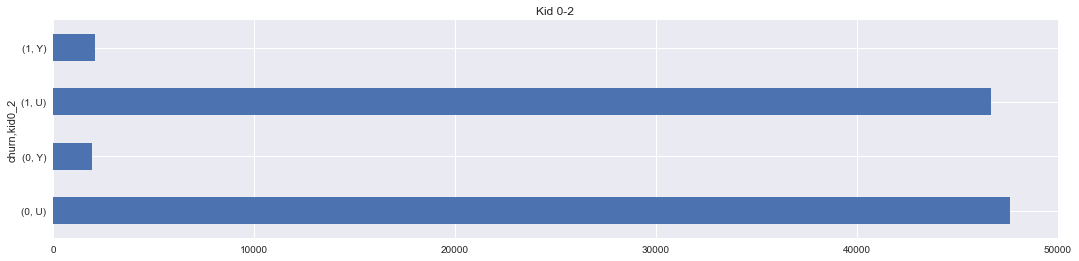

In [14]:
# Bar Plot group by 'churn' for the significant categorical attributes
# Example Histogram by 'Churn' group for 'Ethnic'

plt.figure(figsize = (18,4))
ax = df_churn.kid0_2.value_counts().plot(kind='barh')
plt.title('Kid 0-2')
plt.show()

### Chi-Squre Independence Test Result

Under the test assumptions:
1. Expected frequency for each cell of a contingency table is greater than 5.
2. Samples are independent

This independence test is performed to check the association between 'churn' and each categorical attributes. The null hypothesis is that the 'churn' is independent from another variable that is being tested. Only the p-value is checked since the chi-square value itself is not revealing much information.  The 21 categorical variables are sorted with the lowest p-values.  The most significant five variables are:

- asl_flag : Account spending limit
- crclscod : Credit class code
- hnd_webcap : Handset web capability
- ethnic : Ethnicity roll-up code
- dualband : Dualband (Useful when visit other countries having different frequencies)

# <font color=blue>Data Preparation Part I</font>

### The following process will be performed in order to reduce the number of predictors from a new dataset with 100+ attributes.  This process will help to rank all of the attributes including the newly transformed categorical attributes.  The objective of this process is finding the attributes that is highly associated with the churn values so that we can examine those important attributes first.

### 1. Categorical attributes will be converted into numerical form if possible.
### 2. All categorical attributes that cannot be converted into numerical form will be transformed into dummy variables.
### 3. The following new variables will be added as discussed in the above steps: 'area_longitude' ,  'area_latitude' , 'kidTotMin'
### 4. Feature importance will be checked using ExtraTreesClassifier to more focus on the attributes having more association with churn values.


In [15]:
#1. Convert categorical attributes into numerical

df2 = df
df2.asl_flag = df2.asl_flag.replace(['N', 'Y'], [0, 1])
df2.refurb_new = df2.refurb_new.replace(['N', 'R'], [0, 1])
df2.ownrent = df2.ownrent.replace(['R', 'O'], [0, 1])
df2.dwlltype = df2.dwlltype.replace(['S', 'M'], [0, 1])
df2.infobase = df2.infobase.replace(['N', 'M'], [0, 1])
df2.kid0_2 = df2.kid0_2.replace(['U', 'Y'], [0, 1])
df2.kid3_5 = df2.kid3_5.replace(['U', 'Y'], [0, 1])
df2.kid6_10 = df2.kid6_10.replace(['U', 'Y'], [0, 1])
df2.kid11_15 = df2.kid11_15.replace(['U', 'Y'], [0, 1])
df2.kid16_17 = df2.kid16_17.replace(['U', 'Y'], [0, 1])
df2.creditcd = df2.creditcd.replace(['N', 'Y'], [0, 1])
df2.dwllsize = df2.dwllsize.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [16]:
#2. Transform into dummy variable

df_dummy = pd.get_dummies(df2)
df_dummy.shape

(100000, 207)

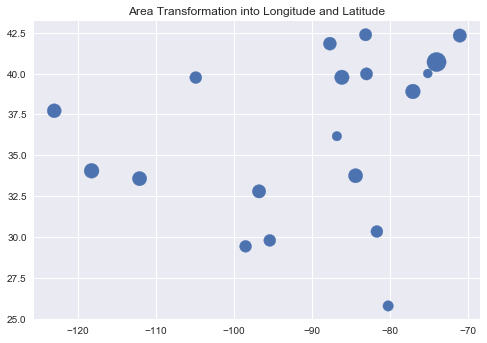

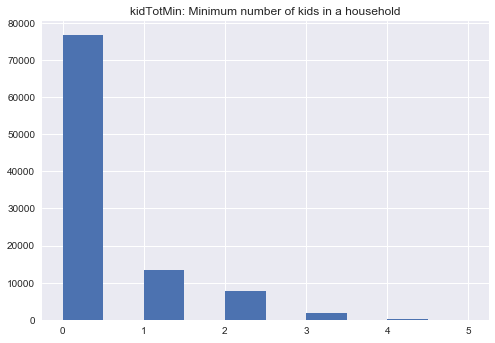

In [17]:
#3. Add new attributes

# 'area_longitude', and 'area_latitude' attributes

area = ['NEW YORK CITY AREA','LOS ANGELES AREA','DC/MARYLAND/VIRGINIA AREA','MIDWEST AREA','SOUTHWEST AREA','ATLANTIC SOUTH AREA','CALIFORNIA NORTH AREA','NEW ENGLAND AREA','DALLAS AREA','CHICAGO AREA','GREAT LAKES AREA','OHIO AREA','NORTH FLORIDA AREA','HOUSTON AREA','NORTHWEST/ROCKY MOUNTAIN AREA','CENTRAL/SOUTH TEXAS AREA','SOUTH FLORIDA AREA','TENNESSEE AREA','PHILADELPHIA AREA']
latitude = [40.7128,34.0522,38.9072,39.7767,33.5722,33.749,37.7272,42.332,32.7933,41.8376,42.383,39.9852,30.3321,29.7866,39.7619,29.4241,25.7752,36.1718,40.0094]
longitude = [-74.0059,-118.2437,-77.0369,-86.1459,-112.0901,-84.388,-123.0322,-71.0202,-96.7665,-87.6818,-83.1022,-82.9848,-81.6556,-95.3909,-104.8811,-98.4936,-80.2086,-86.785,-75.1333]

df_dummy['area_longitude'] = df.area.replace(area,longitude)
df_dummy['area_latitude'] = df.area.replace(area,latitude)

plt.scatter(longitude, latitude, s = df_dummy['area_longitude'].value_counts()/30) # verifying lng/lat information
plt.title('Area Transformation into Longitude and Latitude')
plt.show()

# 'kidTotMin' attribute
df_dummy['kidTotMin'] = df_dummy[['kid0_2','kid3_5','kid6_10','kid11_15','kid16_17']].sum(axis = 1)
plt.hist(df_dummy.kidTotMin)
plt.title('kidTotMin: Minimum number of kids in a household') # verifying number kids distribution
plt.show()

### Feature Importance w/ Extra Trees

Feature Importance from the Forests of Trees packages allows to evaluate the importance of the features on an artificial classification task. 

- 'Customer_ID' attribute is removed since it looks like the ID is assigned after the data is collected. 

- Rows having null values are dropped from the data frame.

- Attributes are ordered with the feature importance values to focus only on the attributes having higher importance.

In [18]:
#4a. Preperation for Feature Importance

# Dropping 'Customer_ID' 
df_dummy = df_dummy.drop('Customer_ID', axis = 1)
    
df_dummy_NaN = df_dummy.dropna()
print('df_dummy_NaN.shape =', df_dummy_NaN.shape)
# print('df_dummy_NaN.columns = ', df_dummy_NaN.columns)

df_dummy_NaN.shape = (40166, 209)


In [19]:
#4b. Feature Importance Calculation by ExtraTreesClassifier

np.random.seed(0)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

X= preprocessing.scale(df_dummy_NaN.ix[:, df_dummy_NaN.columns != 'churn']) 
Y = df_dummy_NaN.churn
col_x_list = list(df_dummy_NaN.ix[:, df_dummy_NaN.columns != 'churn'])

# feature extraction
model = ExtraTreesClassifier(random_state  = 0)
model.fit(X, Y)

# Sort Attributes with fit.scores
ETTest = pd.DataFrame({'Attribute': col_x_list, 'Importance': model.feature_importances_})

# Add Rank
ETTest['ETree_Rank'] = ETTest['Importance'].rank(ascending = 0)
ETTestSort = ETTest.sort_values(by = 'ETree_Rank', axis = 0, ascending = True)
ETTestSort = ETTestSort.reset_index(drop = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(ETTestSort)

                              Attribute  Importance  ETree_Rank
0                                months    0.016163         1.0
1                               eqpdays    0.015794         2.0
2                             hnd_price    0.012801         3.0
3                                   lor    0.012235         4.0
4                            change_mou    0.012000         5.0
5                           totmrc_Mean    0.011625         6.0
6                              totcalls    0.011368         7.0
7                                adults    0.011321         8.0
8                                adjrev    0.011312         9.0
9                                avgrev    0.011079        10.0
10                               income    0.011037        11.0
11                               totrev    0.010988        12.0
12                               avgqty    0.010932        13.0
13                             numbcars    0.010576        14.0
14                               adjqty 

In [20]:
# New Attribute Ranking

ETTestSort.loc[ETTestSort.Attribute.isin(['area_longitude','area_latitude','kidTotMin']),:]

Attribute  Importance  ETree_Rank
53  area_longitude    0.008832        54.0
54   area_latitude    0.008540        55.0
63       kidTotMin    0.007639        64.0

In [21]:
# Categorical Attributes Ranking for the attributes showed high chi-squre values

ETTestSort.loc[ETTestSort.Attribute.isin(['asl_flag', 'refurb_new','ownrent','dwllsize']),:]


Attribute  Importance  ETree_Rank
71     dwllsize    0.006680        72.0
92   refurb_new    0.004653        93.0
102    asl_flag    0.003681       103.0
139     ownrent    0.002176       140.0

### Data Preparation Part I Summary

#### New attributes('area_longitude','area_latitude','kidTotMin') showed low ranks in importance to help classifying the churn values.  The ranks were worse than 50th so those attributes will not be reviewed until we have to.

#### None of the dummy variables are ranked better than 50th.

#### The most promising categorical variable('asl_flag') which shows the highest chi-square value ranked 108th. What is interesting about  the 'dwllsize' attribute is that it is converted into 15 different numbers showing much higher rank than the 'asl_flag' as the 75th in importance ranking.

#### The most important attributes will be reviewed to understand the data more before the attributes are used in the modeling process.  

# <font color=blue>Data Preparation Part II</font>

### In this step, the top 15 important attributes, that are found from the previous step, will be examined to understand the data better and ready the model to predict 'churn' values. 

Data quality checks, Simple statistics, and Data visualization techniques will be utilized.

### 1. Null Values

The specific issue we faced had to deal with null values. It appears that a majority of null values occurs in demographic data, where consumers would need to self-identify their attributes, explaining the lack of data overall in these records. The percentages below help us narrow down which demographic values should be included carefully in a prediction model because the number of samples available in the model is dependent on the maximum number of values in the predictors. The number of cars in a household('numbcars') is missing about 50% of the data so this attribute will be removed since that is a signficant loss of data.  

Length of residence(lor) shows the highest percentage in null value at about 30%.  If this value is included, the sample data available for modeling is only 70% of total recordings which is 70,000 samples in our case.  70,000 is a suitable amount of sample to work with so the maximum 30% loss in our sample is acceptable. 


### 2. Multicolinearity

Correlation coefficients and scatter plots can be utilized to check the strength of association. The predictors showing high correlations will be removed in order to minimize the variable inflation. 

In [22]:
# Null value check for the top 15 important attributes

col_list = ETTestSort.Attribute[0:15]
df2 = df.loc[:, df.columns.isin(list(col_list))]
null =df2.isnull().sum()/len(df2.index)
print(null.sort_values(ascending = False))

numbcars       0.49366
lor            0.30190
income         0.25436
adults         0.23019
change_mou     0.00891
hnd_price      0.00847
totmrc_Mean    0.00357
eqpdays        0.00001
avgqty         0.00000
avgrev         0.00000
adjqty         0.00000
adjrev         0.00000
totrev         0.00000
totcalls       0.00000
months         0.00000
dtype: float64


In [23]:
# Drop 'numbcars'
df2 = df2.drop('numbcars', axis = 1)

# New data frame with 'churn' for scatter matrix
df3 = pd.concat([df.churn, df2], axis = 1)

# Drop NaN values from the data frame with only 15 attributes

df2_NaN = df2.dropna() # without 'churn' in the data frame
df3_NaN = df3.dropna() # with 'churn' 
print('df2_NaN.shape =', df2_NaN.shape)
print('df3_NaN.shape =', df3_NaN.shape)

df2_NaN.shape = (68446, 14)
df3_NaN.shape = (68446, 15)


### Scatter Plot

- The scatter plot for the highly correlated attributes clearly shows the relations.

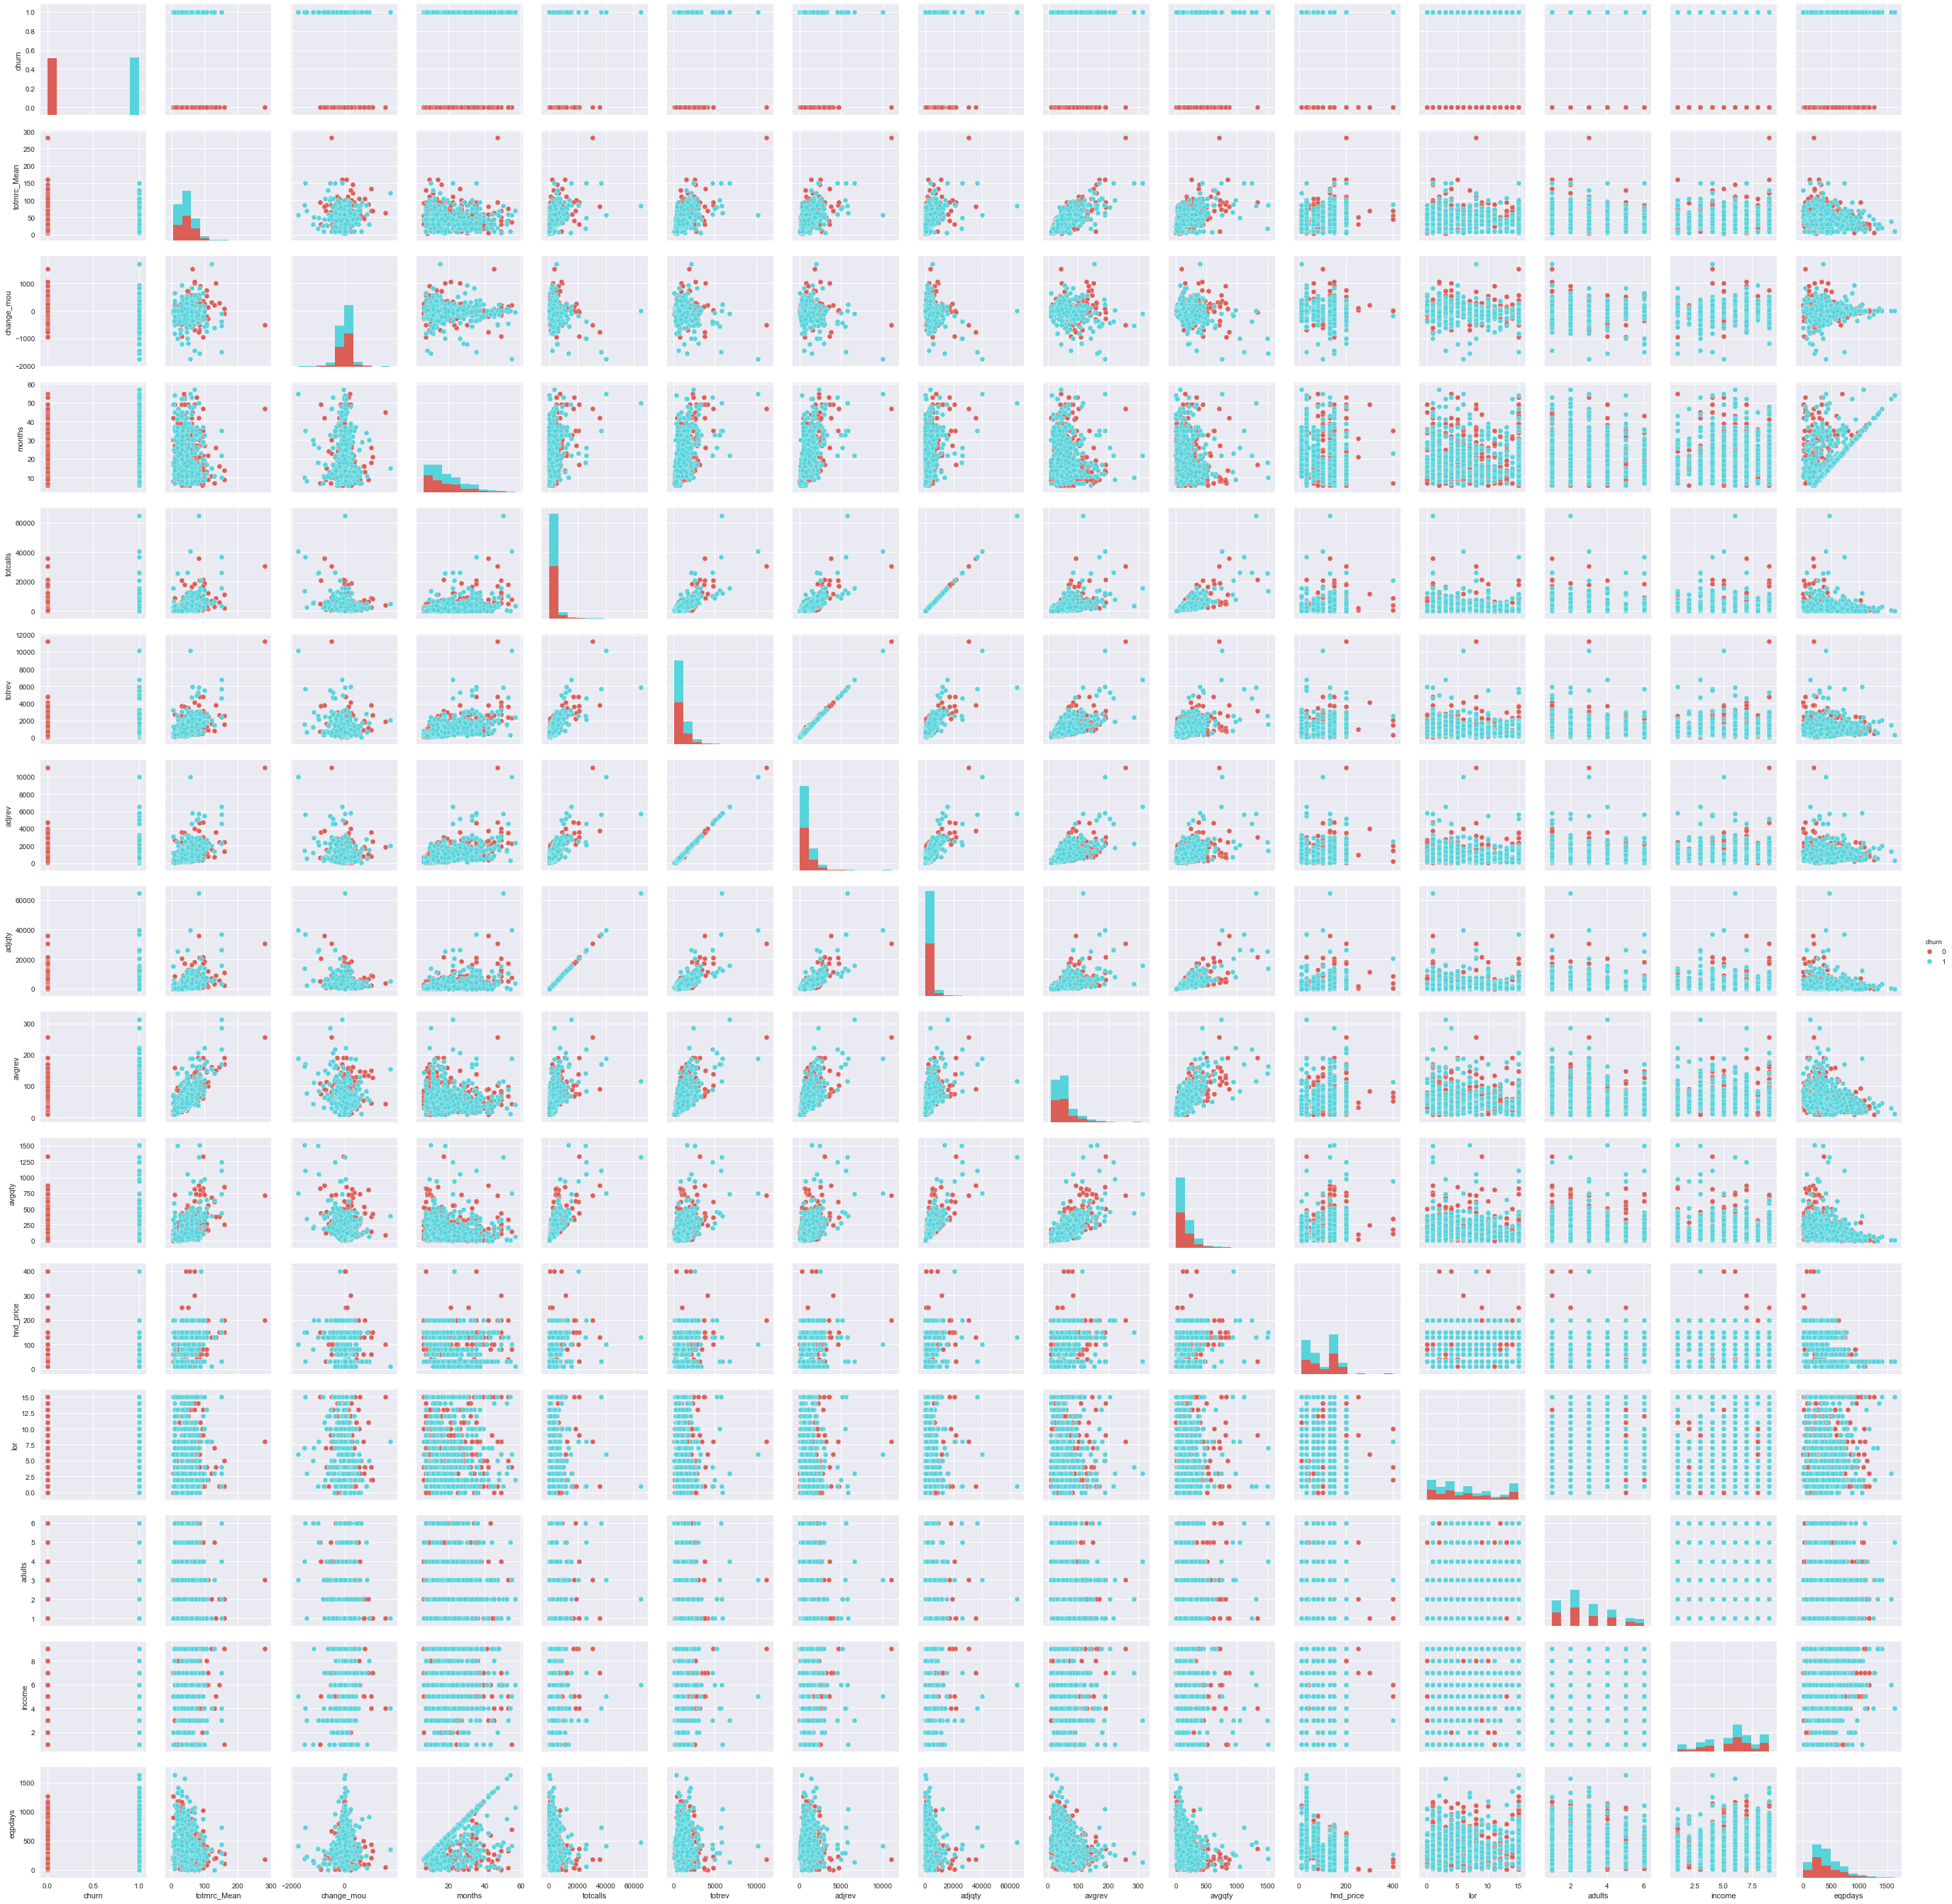

In [24]:
# Scatter Matrix (Part 1: Overall Distribution)

# import seaborn as sns  

# sample values for scatter plot (1,000 recordings)
df3_NaN_sample = df3_NaN.sample(n = 1000, random_state = 0, axis = 0)

sns.pairplot(df3_NaN_sample, hue = 'churn', palette = 'hls')
plt.show()

### Correlation Coefficient Heat Map

- Heat map indiciates if multicollinearity exists or not.
- Based on the result of heat map and index of corr.coef higher than 0.8, multiple predictors are involved in the multicollinearity.

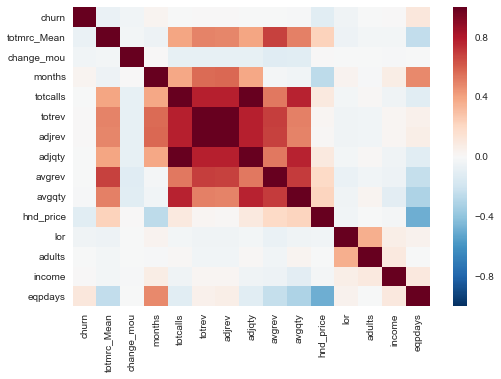

In [25]:
# import seaborn as sns

# Heatmap for the above correlation coefficients
corr = df3_NaN.corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

### Correlation Coefficient

#### Based on the above feature importance result the attributes showing high correlation below will be removed.
- Attribute dropped : totrev, adjrev, adjqty, avgqty will be dropped.
- Attribute not dropped : totcalls 

In [26]:
# Idendifying highly correlated attributes

HighCorr = corr > .75   # Enter desired corr.coef value as a limit

result = pd.melt(HighCorr.reset_index(), id_vars=['index'])
mask = result['value'] == True
result = result.loc[mask, ['index', 'variable']]
result.columns = [0, 1]
# print(result)

HighCorr_var = result.ix[result.ix[:,0] != result.ix[:,1] ,:]
print(HighCorr_var)
HighCorr_varList = HighCorr_var.ix[:,0]
HighCorr_varList = HighCorr_varList.drop_duplicates()
# print(HighCorr_varList)

            0         1
65     totrev  totcalls
66     adjrev  totcalls
67     adjqty  totcalls
69     avgqty  totcalls
79   totcalls    totrev
81     adjrev    totrev
82     adjqty    totrev
94   totcalls    adjrev
95     totrev    adjrev
97     adjqty    adjrev
109  totcalls    adjqty
110    totrev    adjqty
111    adjrev    adjqty
114    avgqty    adjqty
139  totcalls    avgqty
142    adjqty    avgqty


### Top 10 Attributes Selected

#### With chi-test, feature importance test, and multicollinearity checks, the final 10 attributes are selected

In [27]:
# Drop Multicollinearity

col_list = list(ETTestSort.Attribute[0:15])
for i in ['totrev', 'adjrev', 'adjqty', 'avgqty']:
    col_list.remove(i)

df4 = df.loc[:, df.columns.isin(col_list)]
df4 = df4.drop('numbcars', axis = 1)
df5 = pd.concat([df.churn, df4], axis = 1)
print(list(df5))

df4_NaN = df4.dropna() # without 'churn' in the data frame
df5_NaN = df5.dropna() # with 'churn' in the data frame
print('df4_NaN.shape =', df4_NaN.shape)

['churn', 'totmrc_Mean', 'change_mou', 'months', 'totcalls', 'avgrev', 'hnd_price', 'lor', 'adults', 'income', 'eqpdays']
df4_NaN.shape = (68446, 10)



# <font color=blue>Simple Statistics</font>


### Basic Statistics for Numerical Attributes
The average time a consumer is with a provider is a little over a year. The data is split pretty evenly between customers who churned or not. 

In [28]:
# Basic stats of the first 20 attributes
# ! describe function only shows 20 outputs at a time

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df4_NaN.describe())

        totmrc_Mean    change_mou        months      totcalls        avgrev  \
count  68446.000000  68446.000000  68446.000000  68446.000000  68446.000000   
mean      44.882583    -12.061496     19.609400   2796.463285     54.982521   
std       23.231149    263.099966      9.825947   3828.284067     34.341333   
min      -26.915000  -3331.250000      6.000000      0.000000      0.480000   
25%       29.992500    -77.250000     12.000000    822.000000     34.090000   
50%       43.780000     -5.250000     18.000000   1720.000000     46.680000   
75%       57.074375     56.000000     25.000000   3387.000000     65.417500   
max      399.990000  31219.250000     61.000000  98874.000000    924.270000   

          hnd_price           lor        adults        income       eqpdays  
count  68446.000000  68446.000000  68446.000000  68446.000000  68446.000000  
mean      98.802631      6.182100      2.663779      5.781901    411.580209  
std       61.237941      4.733025      1.452848      2

### Box Plot

- One outlier from the 'change_mou' is detected and removed
- Box plot shows that most of the attributes are right-skewed. Log-transform will help to normally distribute the data. 

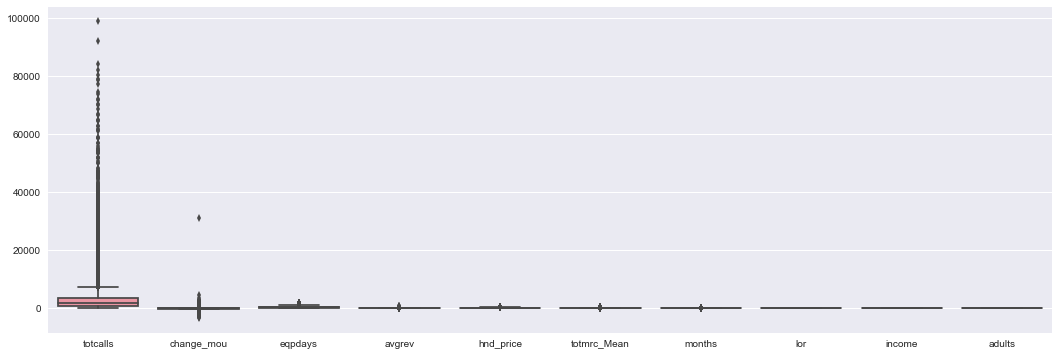

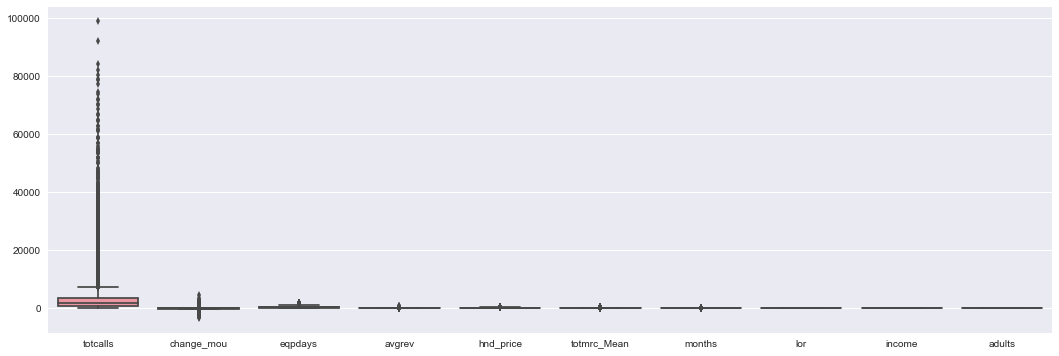

In [29]:
# import seaborn as sns

# Sort atrributes by max value for box plot
df4_NaN_sort = df4_NaN.ix[:, df4_NaN.max().sort_values(ascending = False).index]

# Box Plot
plt.figure(figsize = (18,6))
sns.boxplot(data = df4_NaN_sort)
plt.show()

# Some row contains a outlier for the 'change_mou' attribute then run below

# Droping the outlier
df4_NaN_NoOut = df4_NaN.drop(df4_NaN['change_mou'].idxmax())
df5_NaN_NoOut = df5_NaN.drop(df5_NaN['change_mou'].idxmax())


# Sort atrributes by max value for box plot
df4_NaN_NoOut_sort = df4_NaN_NoOut.ix[:, df4_NaN_NoOut.max().sort_values(ascending = False).index]

# Box Plot
plt.figure(figsize = (18,6))
sns.boxplot(data = df4_NaN_NoOut_sort)
plt.show()


# <font color=blue> Explore Joint Attributes</font>

### Group By 'Churn', Mean Values

The noticible difference in group means are:

- Change in minute of use('change_mou') is drastically dropping for those who churn. 
- Those who do not churn showing more time in usage (avgmou)
- The average handset price(hnd_price) is higher for those who did not churn.  
- The length of residence(lor) is higher for those who did not churn.
- The average age('eqpdays') of a phone is younger for those who did not churn.


In [30]:
# Mean by group

df_churn_mean = df5_NaN.groupby(['churn']).mean()
print("Group Mean : \n", df_churn_mean)
print("\n")
df_std = df5_NaN.std()
print("Standard Deviation : \n", df_std)

Group Mean : 
        totmrc_Mean  change_mou     months     totcalls     avgrev   hnd_price  \
churn                                                                           
0        46.440858   -3.137048  19.315313  2822.649700  55.235300  105.519640   
1        43.239750  -21.470213  19.919445  2768.855908  54.716024   91.721135   

            lor    adults    income     eqpdays  
churn                                            
0      6.384576  2.673357  5.769550  381.516981  
1      5.968637  2.653681  5.794922  443.274768  


Standard Deviation : 
 churn             0.499829
totmrc_Mean      23.231149
change_mou      263.099966
months            9.825947
totcalls       3828.284067
avgrev           34.341333
hnd_price        61.237941
lor               4.733025
adults            1.452848
income            2.204122
eqpdays         264.472494
dtype: float64


### Correlation coefficient with Churn

#### Negative high correlation is observed from handset price('hnd_price') and total monthly recurring charge ('tormrc_Mean').
#### Positive high correlation is found from the number of days of current equipment ('dqpdays').

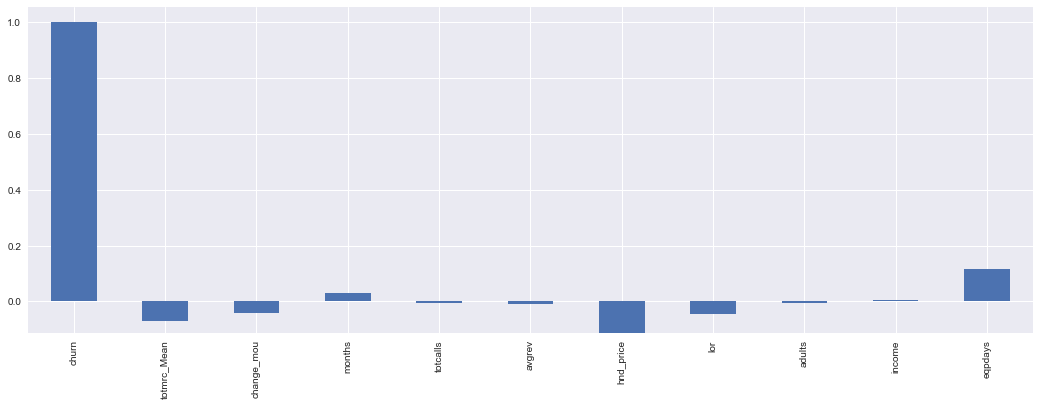

In [31]:
# Correlation Coefficient w/ 'Churn'
# Unfortunately there is no attribute that is strongly correlated with 'Churn' except by itself.

corr = df5_NaN_NoOut.corr()
plt.figure(figsize = (18,6))
corr.churn.plot.bar()
plt.show()

# <font color =purple> <center> Mini-Project </font> </center>

### The purpose is to investigate whether a <font color =red>Logistic Regression </font> or <font color =blue>Support Vector Machine</font> model better predicts whether a customer is likely to "churn" or abandon their service provider given our ten selected variables.

### Dataset for Modeling

The original dataset was reduced down to 10 attributes from the original 100 attributes through multiple tests and examinations. 

In [32]:
# Filtered Dataset

# Dataset with 'churn' altogether
df_all = df5_NaN_NoOut
print(df_all.shape)

# Dataset with 'churn' separted
df_churn = df5_NaN_NoOut.churn
df_noChurn = df5_NaN_NoOut.drop('churn', axis = 1)
print(df_noChurn.shape)

(68445, 11)
(68445, 10)



### The variables we are focusing on:
|    Variable Name    |    Type       |    Definition                                                                       |
|---------------------|---------------|-------------------------------------------------------------------------------------|
|    totmrc_Mean      |    Numeric    |    Mean total monthly recurring charge.                                             |
|    change_mou       |    Numeric    |    Percentage change in monthly minutes of use vs previous three   month average    |
|    months           |    Numeric    |    Percentage change in monthly minutes of use vs previous three   month average    |
|    totcalls         |    Numeric    |    Total number of calls over the life of the customer                              |
|    avgrev           |    Numeric    |    Average monthly   revenue over the life of the customer                          |
|    hnd_price        |    Numeric    |    Price of Handset                                                                 |
|    lor              |    Numeric    |    Length of residence                                                              |
|    adults           |    Numeric    |    Number of adults in household                                                    |
|    income           |    Numeric    |    Estimated income                                                                 |
|    eqpdays          |    Numeric    |    Number of days (age) of current equipment.                                       |

# <font color=purple> <center> Scope </center> </font>

### <font color=red> Logistic Regression </font>
- Logistic regression classification output comparison with data normalization
- Function parameter selection 1: Logistic regression accuracy comparison with differernt function parameters
- Logistic regression model accuracy check with the best function parameters for our dataset
- Feature importance analysis with logistic regression coefficients
- Accuracy of logistic regression with eliminating unimportant features

### <font color=blue> Support Vector Models </font>
- Function parameter selection 2: Linear Support vector classification(SVC) accuracy with C parameters.
- Function parameter selection 3: Non-linear Support vector classification accuracy with RBF C parameters.
- Function parameter selection 4: Non-linear Support vector classification accuracy with RBF gamma parameters.
- Non-linear SVC model accuracy check with the best function parameters for our dataset
- Interpretation of Non-linear SVC model outputs

### <font color =purple> Model Advantages/Conclusion </font>
- We will elect Support Vector Models as superior for this analysis

# <font color=red> Logistic Regression </font>
### Logistic Regression models are used to determine the probability of an event occuring depending on independent variables that could be catagorical or numerical. In our case, our features are all numerical. Where Logistic Regression excels, compared to other models like linear and multiple regression, is that the values of the dependent event variable must be binary. Fortunately in our case, our dataset already came predetermined with the binary attribute of Churn. We will plot our top ten other customer attributes against the Churn variable to determine if the probabilities of a customer churning given their various aspects.

### Normalization in dataset

- For logistic regression, normalization will be used to be able to compare the weights of the predictor using the coefficients of logistic regression.
- For SVM classifications, normalization is necessary since the SVM is sensitive to outliers. 
- Below example shows why the normalization helps to review the coefficients of the logistic regression.  However, there was no noticeable difference in prediction accuracy with/without the normalization in predictors.

Accuracy_raw: 
 0.555
Confusion_raw: 
 [[4383 2556]
 [3537 3213]]

Accuracy_norm: 
 0.555
Confusion_norm: 
 [[4383 2556]
 [3536 3214]]


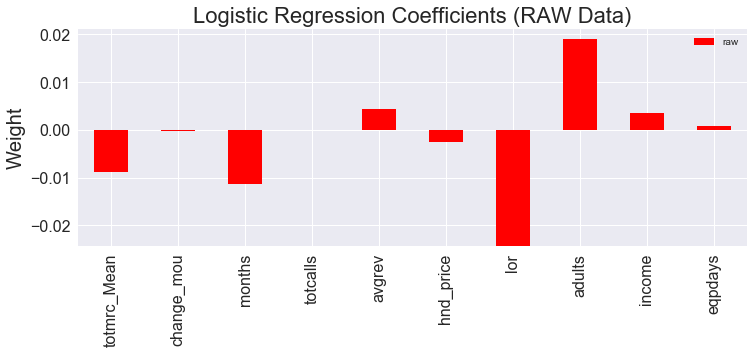

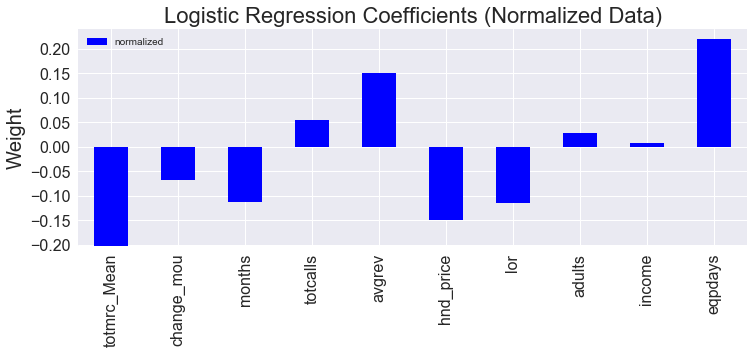

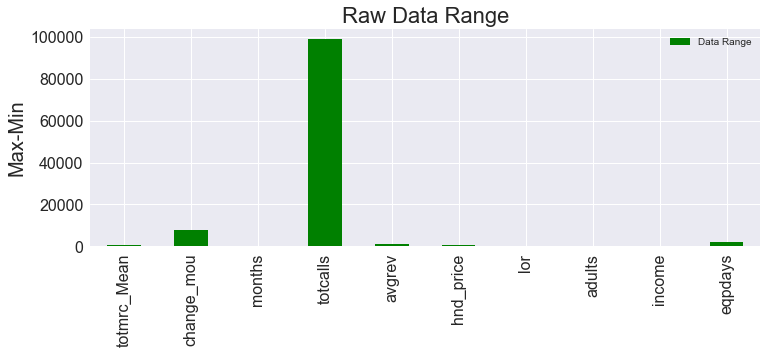

In [33]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
from sklearn import metrics as mt
# from sklearn.svm import LinearSVC


# define predictor and outcome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# define cv_object
num_cv_iterations = 1
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

model_score = np.zeros((num_cv_iterations, 1, 5))

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    ## WITHOUT Data Normalization
    # train the model  
    clf = LogisticRegression(C = 1, penalty = 'l2', random_state = 0)
    clf.fit(X_train, y_train)

    # print results
    y_hat = clf.predict(X_test) # get test set precitions
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print('Accuracy_raw: \n', round(acc,3) )
    print('Confusion_raw: \n', conf)
    coef_raw = clf.coef_

    ## WITH Data Normalization
    # train the model  
    clf = LogisticRegression(C = 1, penalty = 'l2', random_state = 0)
    clf.fit(X_train_scaled, y_train)

    # print results
    y_hat = clf.predict(X_test_scaled) # get test set precitions
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    
    print('\nAccuracy_norm: \n', round(acc,3) )
    print('Confusion_norm: \n', conf)
    coef_norm = clf.coef_


    # plot weight of predictors
    col_name = list(df_noChurn)
    coef_raw1 = pd.DataFrame(coef_raw[0], index = col_name, columns = ['raw'])
    coef_norm1 = pd.DataFrame(coef_norm[0], index = col_name, columns = ['normalized'])
    data_range = pd.DataFrame(df_noChurn.max() - df_noChurn.min(), index = col_name, columns = ['Data Range'])

    coef_raw1.plot(kind = 'bar', color='red', figsize = (12,4))
    plt.title('Logistic Regression Coefficients (RAW Data)', size = 22)
#     plt.xlabel('Predictors', size = 20)
    plt.ylabel('Weight', size = 20)
    plt.xticks(size = 16)
    plt.yticks(size = 16)

    coef_norm1.plot(kind = 'bar', color='blue', figsize = (12,4))
    plt.title('Logistic Regression Coefficients (Normalized Data)', size = 22)
#     plt.xlabel('Predictors', size = 20)
    plt.ylabel('Weight', size = 20)
    plt.xticks(size = 16)
    plt.yticks(size = 16)
    
    data_range.plot(kind = 'bar', color='green', figsize = (12,4))
    plt.title('Raw Data Range', size = 22)
#     plt.xlabel('Predictors', size = 20)
    plt.ylabel('Max-Min', size = 20)
    plt.xticks(size = 16)
    plt.yticks(size = 16)

    plt.show()

#### Normalization Summary:
The normalization in the predictors are necessary when the coefficients of the logistic regression need to be used for feature importance.  Due to the normalization the magnitude of the coefficients can be compared directly with other coefficients as an indication of association with the dependent variable.  Without the normalization the magnitude of the coeficients are more affected by the size of original data.  With large data the coefficients has to be small as shown in the above bar graphs. 

### Logistic Regression Classifier parameter comparison

Three fold cross-validation is performed for all parameter optimization processes to get the average accuracy values.  An array of C-values are tested to get the maximum accuracy of prediction.  C-value is a regularization parameter to reduce overfitting. Smaller C-value gives stronger regularization. 

Found that the C=1 is fine since there was not much difference with changes in C values for our dataset. 

In [34]:
# import libraries
from sklearn.linear_model import LogisticRegression
import time
t = time.time()  # Check Calculation Time

# Define predictor and coucome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

# Model parameter interation
C = [.1, 1, 5, 10, 50, 100, 150]

model_score = np.zeros((3, len(C), 5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) 
    X_test_scaled = scl_obj.transform(X_test) 

    
    k = 0  # counter for model_score
    for i in C:
        # train the model  
        clf = LogisticRegression(C = i, penalty = 'l2', random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # print results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
        k +=1

    iter_num+=1

# figure.subplots_adjust(left=.02, right=.98)
# plt.show()

# 
LogisticRegression_score_mean = round(pd.DataFrame(model_score.mean(axis = 0), index = C, columns = model_score_col ), 3)
print(LogisticRegression_score_mean)


elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

       Accuracy  Conf11    Conf12    Conf21    Conf22
0.1       0.566  4434.0  2581.667  3358.333  3315.000
1.0       0.566  4432.0  2583.667  3357.667  3315.667
5.0       0.566  4432.0  2583.667  3357.667  3315.667
10.0      0.566  4432.0  2583.667  3357.667  3315.667
50.0      0.566  4432.0  2583.667  3357.667  3315.667
100.0     0.566  4432.0  2583.667  3357.667  3315.667
150.0     0.566  4432.0  2583.667  3357.667  3315.667
Elapsed time is  0.1  minutes


### <font color= red>Confirming Accuracy with 10 fold Cross Validation</font>

The accuracy of logistic regression with the optimal parameter (C=1, penalty = 'l2') was 0.566. We also attempted to use SAG and Newton-CG, which resulted in  liblinear winning out as the most accurate parameter. 


   Accuracy  Conf11  Conf12  Conf21  Conf22
1     0.566  4434.7  2597.4  3340.6  3316.3


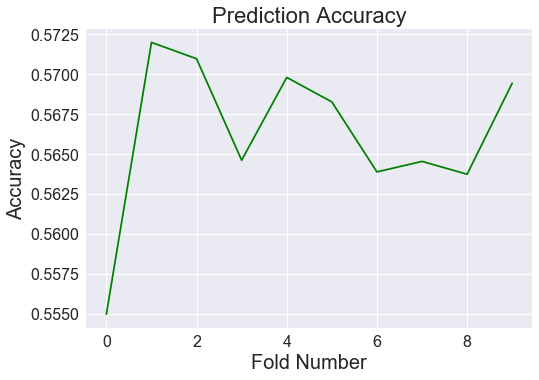

Elapsed time is  0.0  minutes


In [35]:
# import libraries
from sklearn.linear_model import LogisticRegression

t = time.time()  # Check Calculation Time

# Define predictor and coucome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

# Model parameter interation
C = [1]

model_score = np.zeros((num_cv_iterations, len(C), 5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']
acc_all = np.zeros((num_cv_iterations))

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) 
    X_test_scaled = scl_obj.transform(X_test) 

    
    k = 0  # counter for model_score
    for i in C:
        # train the model  
        clf = LogisticRegression(C = i, penalty = 'l2', random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # print results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        acc_all[iter_num] = acc
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
        k +=1

    iter_num+=1


LogisticRegression_score_mean = round(pd.DataFrame(model_score.mean(axis = 0), index = C, columns = model_score_col ), 3)
print(LogisticRegression_score_mean)

# Prediction Accuracy Plot
# plt.bar(left = np.arange(0,10),height = acc_all, color = 'green')
plt.plot(acc_all, color = 'green')
plt.title('Prediction Accuracy', size = 22)
plt.xlabel('Fold Number', size = 20)
plt.ylabel('Accuracy', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.show()

elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

### <font color=red> Feature Importance</font>

The coefficients of the logistic regression is checked. Since the data was normalized, the magnitudes of coefficients directly represent the importance of the features.  For instance, the 'eqpdays'(the number of days (age) of current equipment) shows the highest coefficient, 0.216, which is the log odds. This means the longer a customer is with a subscriber, the more likely they are to churn, and that feature, above all else effects churn. 'eqpdays' has a possitive association with 'churn', and the log odds of churning is increasing by 0.21 for everyday if everything else is remaining constant. But what does the specific value of .216 mean in the case of  eqpdays? The log odds can be exponentiated in order to give a real meaning.  exp(0.216) is 1.24 so we expect to see about 24% increase in the odds of being churn when the age of phone increase by 1 day.  The magnitude of the coefficients regardless of its sign shows the importance of the attribute.  Since the exponent of 0 is 1, as long as it is far from 0, the corresponding features have weights to change the odd ratio.
Similarily the totmrc_mean has a very high negative correlation with churn. This means that the greater the average monthly charge, the less likely a customer is to churn, an assumption that would be highly counter-intuitive and could not be concluded to without this analysis. 
An intuitive negative correlation can be seen in handset price, which is approximately our fourth valuable feature. Especially these days with the new iphone approaching a grand, you are less likely to pick up and go to another subscriber after purchasing it. Sure, you can unlock it, but if you ever tried to unlock a phone, you would know that is a significant enough variable on its own to never churn.
Lastly, we would like to discuss our third most valuable feature, average revenue. This coefficient almost insinuates that the the subscriber-provider relationship is eventually destined to end, as the longer the relationship the subsriber has with the provider, they more likely they are to churn.

Reference <https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/>

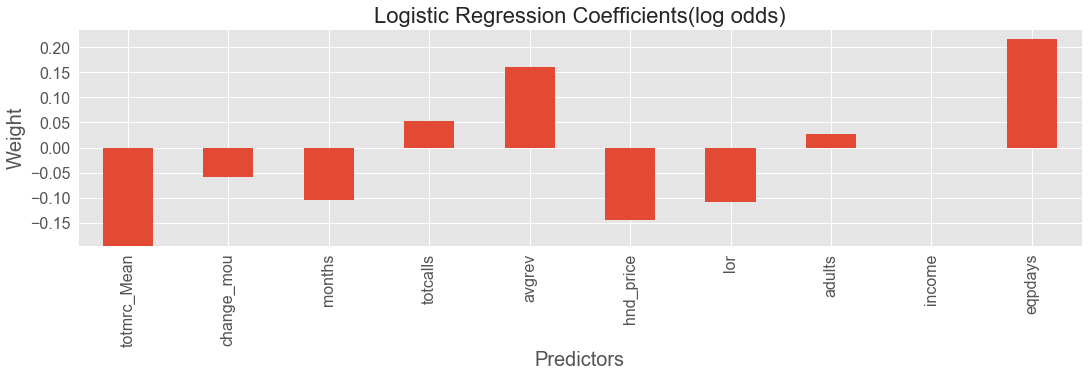

totmrc_Mean   -0.197360
change_mou    -0.058187
months        -0.104362
totcalls       0.053276
avgrev         0.161110
hnd_price     -0.145177
lor           -0.108558
adults         0.027712
income        -0.001548
eqpdays        0.216316
dtype: float64

exp(coef) =  [ 0.82089486  0.94347389  0.90089913  1.05472079  1.17481373  0.86486877
  0.89712725  1.02809954  0.99845325  1.24149514]


In [36]:
# Regression Coefficient Plot

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (18,4))
plt.style.use('ggplot')
weights = pd.Series(clf.coef_[0],index=df_noChurn.columns)
weights.plot(kind='bar')

plt.title('Logistic Regression Coefficients(log odds)', size = 22)
plt.xlabel('Predictors', size = 20)
plt.ylabel('Weight', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.show()
print(weights)
print('\nexp(coef) = ', np.exp(clf.coef_[0]))

### <font color=red> Re-run with Reduced Feature (Logistic Regression)</font>

According to the weight of the above logistic regression, the less significant features, 'income' and 'adults', are dropped. Below is showing the prediction accuracy without the two features.  However, there was no difference in the accuracy with dropping two features. 

In [37]:
# Enter columns to remove
ColumnToRemove = ['income','adults']

In [38]:
# Reassign oriinal filtered data frame
X = df_noChurn
X_columns = list(X)

# deleted listed attributes from the filtered dataFrame
for item in ColumnToRemove:
    if item in X_columns:
        try:
            X = X.drop(item, axis = 1, inplace = False)
        except:
            print(item, ' not exist\n')
            
X_columns = list(X) # final attribute list
print(X_columns)
X = X.as_matrix()  # convert dataFrame into matrix
y = df_churn.as_matrix()

['totmrc_Mean', 'change_mou', 'months', 'totcalls', 'avgrev', 'hnd_price', 'lor', 'eqpdays']


   Accuracy  Conf11  Conf12  Conf21  Conf22
1     0.566  4429.2  2602.9  3338.1  3318.8


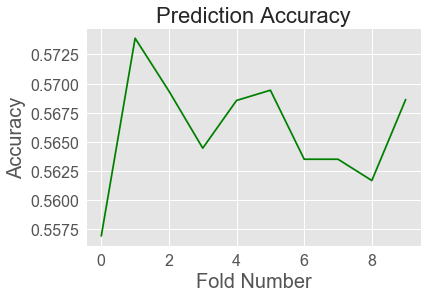

Elapsed time is  0.0  minutes


In [39]:
# import libraries
from sklearn.linear_model import LogisticRegression

t = time.time()  # Check Calculation Time

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

# Model parameter interation
C = [1]

model_score = np.zeros((num_cv_iterations, len(C), 5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']
acc_all = np.zeros((num_cv_iterations))

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) 
    X_test_scaled = scl_obj.transform(X_test) 

    
    k = 0  # counter for model_score
    for i in C:
        # train the model  
        clf = LogisticRegression(C = i, penalty = 'l2', random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # print results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        acc_all[iter_num] = acc
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
        k +=1

    iter_num+=1


LogisticRegression_score_mean = round(pd.DataFrame(model_score.mean(axis = 0), index = C, columns = model_score_col ), 3)
print(LogisticRegression_score_mean)

# Prediction Accuracy Plot
# plt.bar(left = np.arange(0,10),height = acc_all, color = 'green')
plt.plot(acc_all, color = 'green')
plt.title('Prediction Accuracy', size = 22)
plt.xlabel('Fold Number', size = 20)
plt.ylabel('Accuracy', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.show()

elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

The above graph with the removed variables of Adult and Income still have similar ranking to our Normalized data, except the lor and eqpdays magnitude has swapped, similar to our previous data

# <font color=blue> Support Vector Machine (SVM) </font>
 

## Accuracy with SVM Parameter Change

As a linear SVM classification, LinearSVC function will be utilized for the performance comparison since LinearSVC is faster than the SVC(kernel="linear") because the LinearSVC scale to large number of samples <http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html>.  The "hinge" loss function is selected since it is using SVC. The default loss function, "squared_hinge", is considered as RLS(Regularized Least Squared regression problem). <https://cvstuff.wordpress.com/2014/11/29/latex-l_1-versus-latex-l_2-loss-a-svm-example/>

For nonlinear SVM classification, Gaussian RBF Kernel is used to compare with the linear classification. RBF kernel is the most widely used thethod. 

### Linear SVC Classifier

Only three sets of data is used for the classifier parameter comparison. The penalty parameter(C) for the linearSVC was changed (from 0.5 to 1.5 with 0.25 interval) and as a result the accuracy of the LinearSVC was not affected much. In fact, it was all same regardless of the C-values for our datasets. There was a minor difference in the accuracy between the dataset. It is observed that the margin is getting smaller with the higher C value. 

The C-value, 5, is picked based on the average accuracy of three sets of tests.  

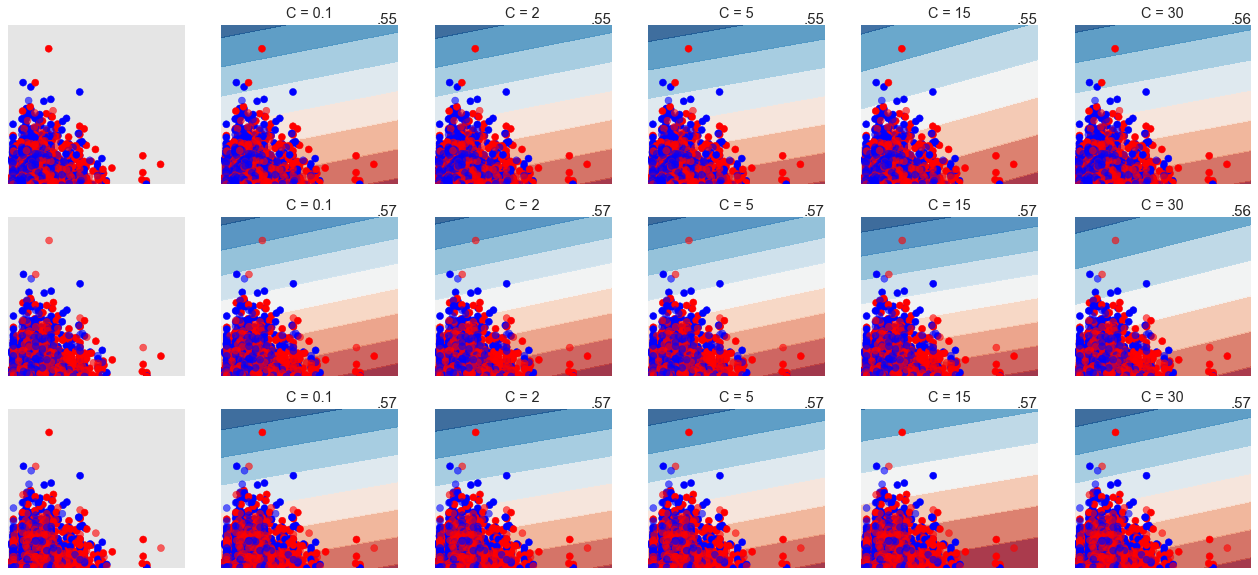

      Accuracy       Conf11       Conf12       Conf21       Conf22
0.1   0.564711  4460.666667  2555.000000  3403.666667  3269.666667
2.0   0.564565  4464.666667  2551.000000  3409.666667  3263.666667
5.0   0.564590  4481.333333  2534.333333  3426.000000  3247.333333
15.0  0.564346  4492.000000  2523.666667  3440.000000  3233.333333
30.0  0.561960  4468.000000  2547.666667  3448.666667  3224.666667
Elapsed time is  2.2  minutes


In [40]:
# import libraries
import time
t = time.time()  # Check Calculation Time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
from sklearn import metrics as mt
from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit

# from sklearn.feature_extraction.text import TfidfVectorizer
# tvect = TfidfVectorizer(min_df=1, max_df=1)


# Define predictor and coucome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

j = 1 # subplot integer
figure = plt.figure(figsize=(18, 10))
hx = 10 # step size in the mesh
hy = 100  

# Model parameter interation
C = [0.1, 2, 5, 15, 30]
model_score = np.zeros((3,5,5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 

    # plot parameters
    
#     sampleRow = np.random.choice(len(X_train_scaled),200) # pick 200 samples
#     X_sample = X_train_scaled[sampleRow,:] # samples for scatter plot (due to memory issue)
    X_sample = X_train_scaled
    x_min, x_max = X_sample[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X_sample[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))

    # Plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(num_cv_iterations, len(C) + 1, j)
    j +=1
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    k = 0  # counter for model_score
    for i in C:
        # train the model  
        clf = LinearSVC(C = i, loss = 'hinge', random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # prtin results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
    
        ax = plt.subplot(num_cv_iterations, len(C)+1, j)
        j +=1
        
        # Plot the decision boundary. 
#        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = clf.decision_function(np.c_[xx.ravel(),xx.ravel(),xx.ravel(),xx.ravel(),xx.ravel(),yy.ravel(),yy.ravel(),yy.ravel(),yy.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Put the result into a color plot
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
#         X_train_sample = X_train[sampleRow,:] # samples for scatter plot (due to memory issue)
#         X_test_sample = X_test[sampleRow,:] # samples for scatter plot (due to memory issue)
        X_train_sample = X_train
        X_test_sample = X_test

        ax.scatter(X_train_sample[:, 0], X_train_sample[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test_sample[:, 0], X_test_sample[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        name = "C = " + str(i)
        ax.set_title(name)
        ax.text(xx.max() - .5, yy.max() - .5, ('%.2f' % acc).lstrip('0'),
                size=15, horizontalalignment='right')
        k +=1

    iter_num+=1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# 
LinearSVC_score_mean = pd.DataFrame(model_score.mean(axis = 0), index = C, columns = model_score_col )
print(LinearSVC_score_mean)


elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

### Nonlinear Support Vector Classifier w/ RBF Kernel
#### Parameter C Optimization:

The best hyperparameter C of SVC for our dataset is same as following.
**SVC(kernel = 'rbf', C = 15, gamma = 'auto')**

The default gamma value('auto') is 1 over number of features. Thus our default gamma value is 1/10 = 0.1.  The optimization in C is performed with the default gamma value, 0.1.  Once the best C value is found, the best value for the gamma will be determined from the following section. 

In [41]:
# SVC C Optimization

# import libraries
from sklearn.svm import SVC

t = time.time()  # Check Calculation Time

# Define predictor and coucome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

# Model parameter interation
C = [0.1, 2, 5, 15, 30]
# gamma = [3, 2, 1, .5, .1]

model_score = np.zeros((3,5,5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    k = 0  # counter for model_score
    for i in C:
        # train the model  
        clf = SVC(kernel = 'rbf', C = i, gamma = 'auto', random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # prtin results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
        k +=1

    iter_num+=1

svcRBF_score_mean = pd.DataFrame(model_score.mean(axis = 0), index = C, columns = model_score_col )
print(svcRBF_score_mean)


elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

      Accuracy       Conf11       Conf12       Conf21       Conf22
0.1   0.580661  4201.666667  2814.000000  2926.333333  3747.000000
2.0   0.583705  4060.333333  2955.333333  2743.333333  3930.000000
5.0   0.584192  4014.666667  3001.000000  2691.000000  3982.333333
15.0  0.583632  3982.666667  3033.000000  2666.666667  4006.666667
30.0  0.580685  3946.333333  3069.333333  2670.666667  4002.666667
Elapsed time is  67.2  minutes


### Nonlinear Support Vector Classifier w/ RBF Kernel
#### Parameter Gamma optimization:

The gamma parameter in the RBF SVM is used to change the influence of training examples.  With lower value in gamma will reach influence furthur to many other samples.  

The best gamma value of SVC was found to be 0.1 which is same as our default gamma. Thus the following settings will be used for furthur SVC runs. 

#### SVC(kernel = 'rbf', C = 15, gamma = 0.1)

In [49]:
# SVC gamma optimization

# import libraries
from sklearn.svm import SVC

t = time.time()  # Check Calculation Time

# Define predictor and coucome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

# Model parameter interation
C = 15  # hyperparameter found from the C optimization from above block
gamma = [.01, .1, .5, 1, 5]  # test parameter values

model_score = np.zeros((3,5,5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    k = 0  # counter for model_score
    for i in gamma:
        # train the model  
        clf = SVC(kernel = 'rbf', C = C, gamma = i, random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # prtin results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
        k +=1

    iter_num+=1

svcRBF_score_mean = pd.DataFrame(model_score.mean(axis = 0), index = gamma, columns = model_score_col )
print(svcRBF_score_mean)


elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

      Accuracy       Conf11       Conf12       Conf21       Conf22
0.01  0.580296  4103.666667  2912.000000  2833.333333  3840.000000
0.10  0.583632  3982.666667  3033.000000  2666.666667  4006.666667
0.50  0.550345  3912.000000  3103.666667  3051.666667  3621.666667
1.00  0.540507  3995.333333  3020.333333  3269.666667  3403.666667
5.00  0.539119  5118.000000  1897.666667  4411.333333  2262.000000
Elapsed time is  227.1  minutes


### <font color=blue>Accuracy Confirmation with 10 fold Cross Validation</font>

**The accuracy of non-linear SVM with the optimal parameters(kernel = 'rbf', C = 15, gamma = 0.1) was 0.584**.

This SVC with RBF kernel showed the highest accuracy with comparing to LinearSVC and logistic regression.  The accuracy is increased about 2% in average.

    Accuracy  Conf11  Conf12  Conf21  Conf22
15  0.584725  3993.5  3038.6  2646.1  4010.8


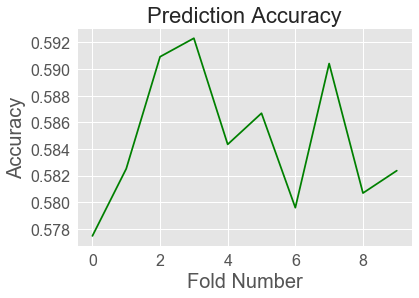

Elapsed time is  58.5  minutes


In [48]:
# import libraries
from sklearn.svm import SVC

t = time.time()  # Check Calculation Time

# Define predictor and coucome variables
X = df_noChurn.as_matrix()
y = df_churn.as_matrix()

# create a cv_object with only 3 iterations for the classification function comparison
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,
                        random_state = 0)

# run classification model for the number of datasets
iter_num=0

# Model parameter interation
C = [15]
# gamma = [3, 2, 1, .5, .1]

model_score = np.zeros((num_cv_iterations, len(C), 5))
model_score_col = ['Accuracy', 'Conf11','Conf12','Conf21','Conf22']

acc_all = np.zeros((num_cv_iterations)) # Accuracy empty array

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 

    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    k = 0  # counter for model_score
    for i in C:
        # train the model  
        clf = SVC(kernel = 'rbf', C = i, gamma = 0.1, random_state = 0)
        clf.fit(X_train_scaled, y_train)

        # prtin results
        y_hat = clf.predict(X_test_scaled) # get test set precitions
        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
#         print('accuracy:', acc )
#         print(conf)
        acc_all[iter_num] = acc
        model_score[iter_num, k,:] = np.append(acc, conf.ravel()) # Collect prediction outputs
        k +=1

    iter_num+=1

svcRBF_score_mean = pd.DataFrame(model_score.mean(axis = 0), index = C, columns = model_score_col )
print(svcRBF_score_mean)

# Prediction Accuracy Plot
# plt.bar(left = np.arange(0,10),height = acc_all, color = 'green')
plt.plot(acc_all, color = 'green')
plt.title('Prediction Accuracy', size = 22)
plt.xlabel('Fold Number', size = 20)
plt.ylabel('Accuracy', size = 20)
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.show()
elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')

### <font color= blue>Performance of Model Summary</font>

Logistic regression, LinearSVC, and SVC with RBF kernel functions are used to compare the performance of classification tasks.  

The below settings are found to be the best to have the highest accuracy.
- Logistic regression: LogisticRegression(C = 1, penalty = 'l2')
    Liblinear outperformed both SAG and newton-cg solvers, and a penalty of l2 outperformed l1
- Linear SVM:          LinearSVC(C = 5, loss = 'hinge')
- Non-linear SVM:      SVC(kernel = 'rbf', C = 15, gamma = 0.1)

The accuracy average and the process time during the parameter selection is same as below. This process used three sets of identical samples for three fold of cross-validation with 5 different parameters. So the calculation time is for running a classification model for 15 times.
- Logistic regression :  0.566 accuracy, 0.1 minutes
- Linear SVM          :  0.564 accuracy, 2.2 minutes       
- Non-linear SVM      :  0.583 accuracy, 227.1 minutes

The accuracy average and the process time with the best parameters are measured with 10 fold of cross-validation with identical samples between models. 
- Logistic regression :  0.566 accuracy, 0.0 minutes      
- Non-linear SVM      :  0.584 accuracy, 58.5 minutes

The non-linear SVM model with RBF kernel showed the highest accuracy as 0.584.  The predicion accuracy between the logistic regression and the linear SVM was about same with 0.566 and 0.564 accordingly.  The prediction accuracy increase was 0.018 from logistic regression or linear SVM models to non-linear SVM with RBF model . The time increase was a large cost to going with the Non-linear SVM model.  The calculation time increase going from the logistic regression to the non-linear SVM model was more than 2,000 times. The calculation time increase from linear SVM to non-linear SVM was about 100 times.  The data matrix size used for this calculation was [68445 x 11].  The ratio of time increase seem really large but about one hour of computing time especially for 10-fold cross-validataion is expected for a normal data analysis project.  


### <font color=blue>Data Insight from Support Vector Classification</font>

The hyperparameter C of RBF is a penalty on the slack variables that measure the degree of violation in the margin constrinats.  The margin constraints will be violated if the SVM output becomes a value between -1 and 1.  All the samples that violating the margin constraints will be included in the support vectors. Increase in the C parameter will give more penalty on violation, then the margin will become narrower with higher C so that the total number in support vector will decrese with higher C value. 

The total number of our support vector shown below is really high.  More than 65% (=46k/68445 = SV/totalSample) of data become support vectors.  This indicate that the model is not doing a good job to separate the 'churn' groups so that the prediction accuracy is expected to be low. Another interpretation is that the dataset is not having a good predictor to seperate the 'churn' groups.  

In [43]:
# look at the support vectors
print(clf.support_vectors_.shape)  # Support vectors.
print(clf.support_.shape)          # ndices of support vectors.
print(clf.n_support_ )             # Number of support vectors for each class.
    

(46444, 10)
(46444,)
[23274 23170]


### <font color=blue> Density Plot Comparison: Support Vectors vs Original Data</font>

The distribution of density plot for the support vectors show almost no differences.  It is making sense since those support vectors are the samples that is hard to distinguish and the distribution with large sample should be normal near the center hyperplane.  On the other hand the density plot for the whole original data shows some difference in the distribution.  The large difference means that the feature has more potential to be utilized as a good predictor for classifying the 'churn' groups. 

Following attributes showed the largest difference in the density plots by grouping with 'churn' values.  Except the 'lor' attribute, the rest three attributes were having important weight from logistic regression with normalized data.  Without data normalization, the logistic regression result in the previous step showed the importance of 'month' and 'lor'.  Thus, the high in difference is covered by the logistic regression importance by the coefficients/wieghts.  Intersting thing is that the below four features are also higly ranked by the feature importance output by the ExtraTrees function, which is shown in the beginning of this notebook.  

- 'month'     : Total number of months in service.
- 'hnd_price' : The price of the handset. 
- 'lor'       : Length of residence
- 'equpdays'  : The number of days that the handset has been in use. 

The interpretation by the density function below is same as below. 
- About the month 12 the churn group distribution is different.  This may means that the people are not likely churn within the 12 month of service. 
- The handset price shows four modes(50, 100, 150, 200 dollars).  This data must be about 10 years or more old since the handset price is mostly less than 200 dollas.  The characteristics of the mode is that those who have expensive handsets(150 and 200 dollars)  churn less; whereas, those who have inexpensive handset(50 dollars) churn more.
- As length of residence increase the churn density drops.  
- At the mark of aroun 356 days of handset use, the frequency of churning group increases. 

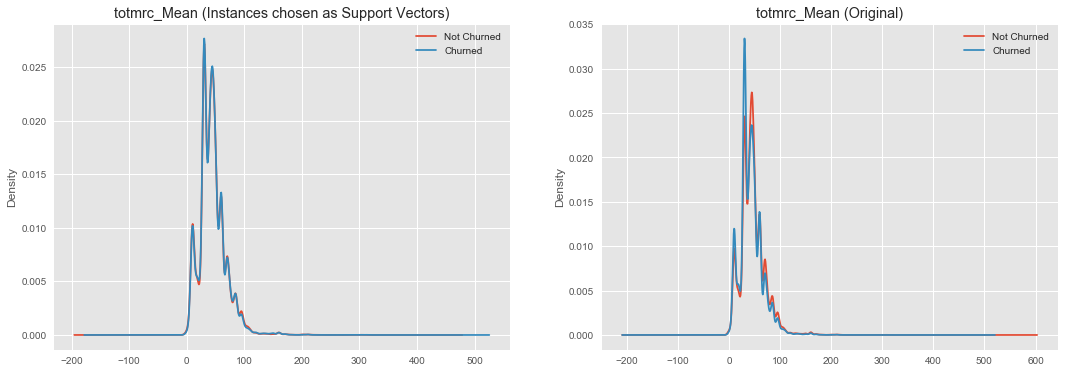

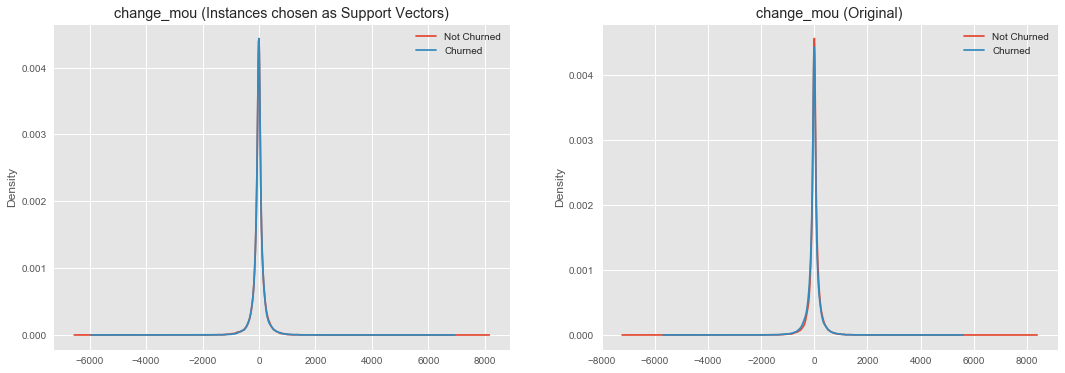

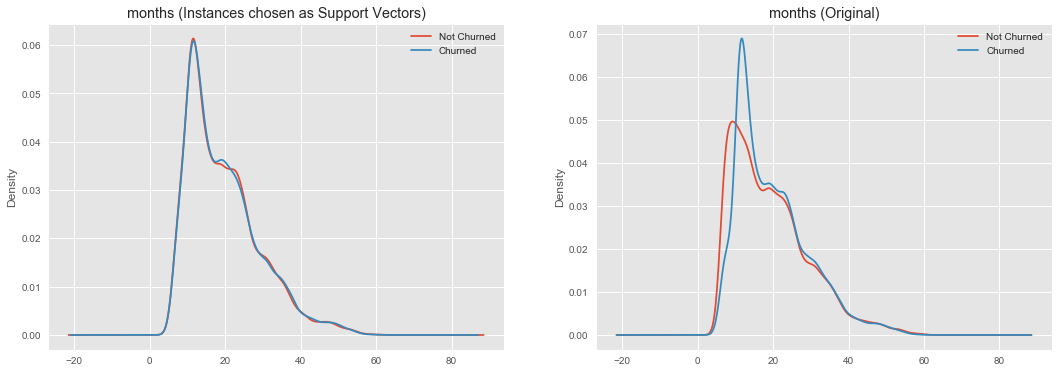

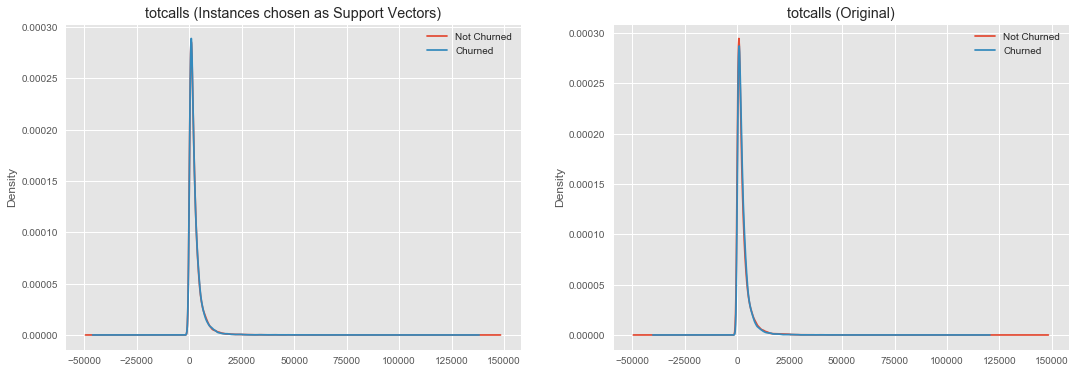

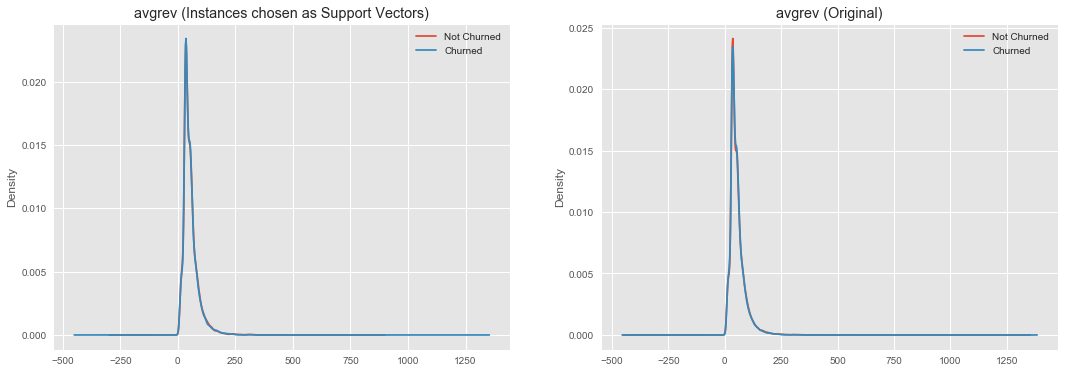

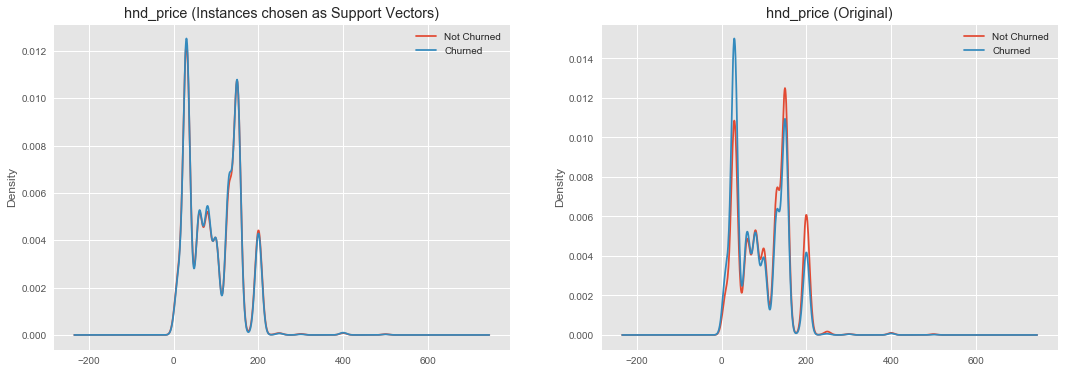

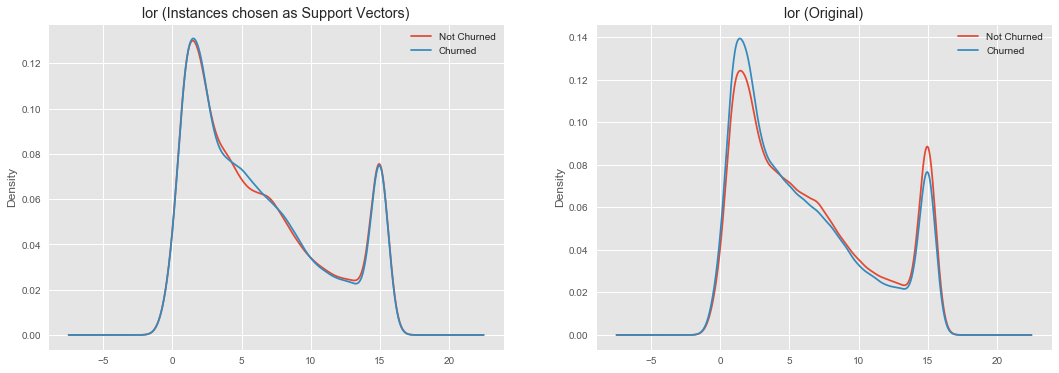

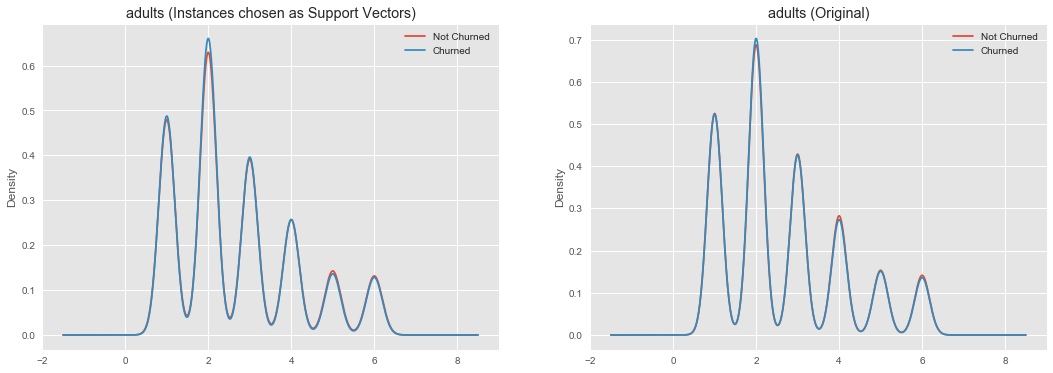

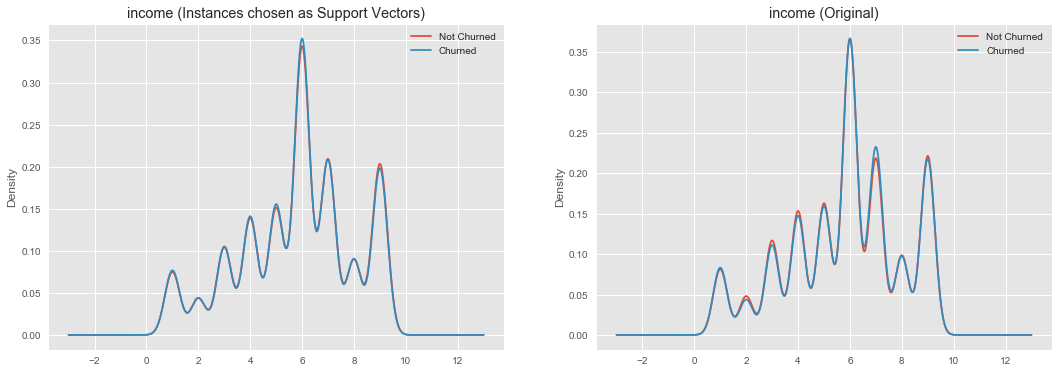

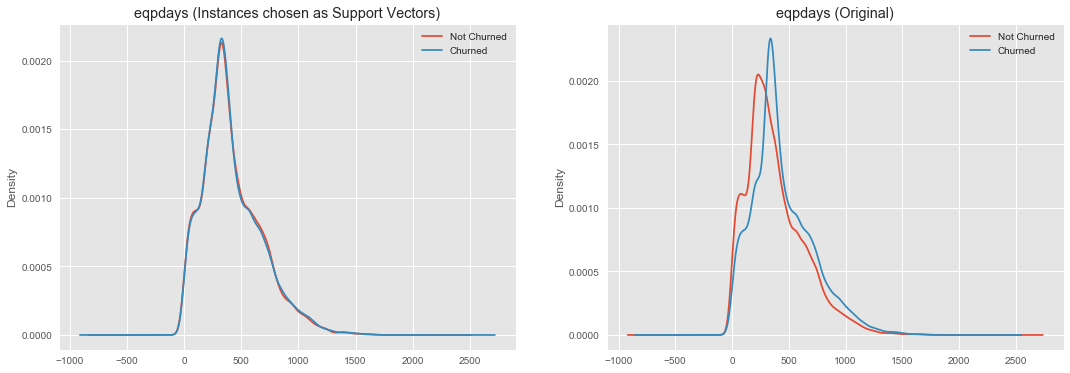

Elapsed time is  1.0  minutes


In [47]:
# import time
t = time.time()  # Check Calculation Time


## Collect Support Vectors
X3 = df_all  # X3 is taking X which is the original dataset including 'churn'

# make a dataframe of the training data
df_tested_on = X3.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[clf.support_,:]

df_support['churn'] = y[clf.support_] # add back in the 'Survived' Column to the pandas dataframe
X3['churn'] = y # also add it back in for the original data
df_support.info()


## Plot Kernel Density
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['churn'])
df_grouped = X3.groupby(['churn'])

# plot KDE of Different variables
vars_to_plot = ['totmrc_Mean','change_mou','months','totcalls','avgrev','hnd_price','lor','adults','income','eqpdays']

for v in vars_to_plot:
    plt.figure(figsize=(18,6))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Not Churned','Churned'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Not Churned','Churned'])
    plt.title(v+' (Original)')
    
plt.show()


elapsed = time.time() - t
print('Elapsed time is ', round(elapsed/60, 1), ' minutes')


# <font color=purple>Conclusion</font>
### Let’s review the accuracy of our models now in the context of the decisions that we must guide the telecom company to make from our model. If you recall, we shared an accuracy score and confusion matrix as follows in our training and evaluation. 
 
Accuracy:
0.566
Confusion:
[[4429 2602]
[3338 3318]]
 
|                       |    Predicted:   No   Churn    |    Predicted:   Churn          |
|-----------------------|-------------------------------|--------------------------------|
|    Actual:   No       |    True Negative =    4429    |    False Positive =  2602      |
|    Actual:   Churn    |    False Negative =   3338    |    True Positive =   3318      |
 
### While the SVM models proved slightly more accurate at 58% as opposed to the 56% shown above from the LR confusion matrix, this is still a very low accuracy rate and would result in a lot of false predictions.  This becomes a big dilemma to solve for two reasons, one the sheer volume of incorrect predictions and two the actual cost with taking action on a false prediction.  The demonstrate the cost issue let’s assume that it will cost the telecom 20/month or 120/year to “save” a member that was going to churn.  Let’s also assume that the telecom makes 40/month in revenue on the average customer.  If we offered each of the 2556 false positive 20 off per month to incent them to stay then for just this little sample that would result in lost revenue of 51K per month!  And with 100M customers, these numbers become staggering to US Telecom carriers.  Similarly, for our false negatives, they stand to lose a net of 20 per month for a customer that does churn and we failed to properly predict and instead provide an incentive to “save” them.  Again, with just our little sample this error rate suggests a loss of 70K per month; factoring that up to 100M customers is an enormous loss in revenue that wish to have prevented.    Managing each of these scenarios may require a slightly different tactic, but it shows us that our strategy is going to require also evaluating that likelihood scores for each customer prediction and make a determination in action based on the likelihood of that particular customer to churn or not churn, and their value to the company, given that some customers are worth much more or much less than 40/month in revenue.  So, our strategy will also involve segmenting the prediction based on revenue potential of the customers.